## FORECASTING GOLD PRICE

 1. DEFINE GOAL
 2. DATA COLLECTION
 3. EXPLORATORY DATA ANALYSIS
 4. PRE-PROCESS DATA
 5. PARTITION SERIES
 6. APPLY FORECAST METHOD(S)
 7. EVALUATE AND COMPARE (CHECK ACCURACY)
 8. IMPLEMENT FORECASTS/ SYSTEM

### 1.GOAL
The Goal is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.


### 2.DATA COLLECTION
Data is already provided, so no need to Collect any data 

### 3.EXPLORATORY DATA ANALYSIS
1. Describing Dataset
2.Clean data and handling missing values and outliers
3.Visualise data distributions through bar charts, histograms, box plots
4.Observe Correlations between variables and visulaize Heat Map etc


##### DESCRIBING DATASET

In [1]:
# Data upload
import pandas as pd
df=pd.read_csv('Gold_data.csv')
df

date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [3]:
#Since the Date column is type object we need to change it to type date time
df['date'] = pd.to_datetime(df['date'])
df

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [5]:
# Changing the index to the dates inorder to make it a time series data
# make date column as index so it is a proper time series data
series = pd.read_csv('Gold_data.csv',header=0,  index_col=0,parse_dates=True,squeeze=True)
series

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [6]:
series.shape

(2182,)

##### CLEANING AND HANDLING MISSING VALUES AND OUTLIERS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


Insight: No missing  values are present in the datset

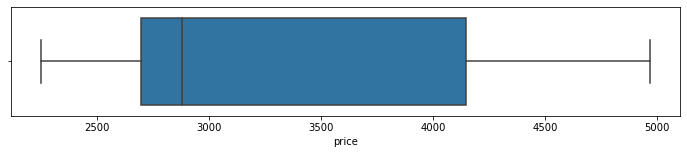

In [8]:
# Box PLot to see if there are any outliers
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = df['price'], whis = 1.5)

Insight: There are no Outliers present in the dataset

##### VISULAIZE DATA DISTRIBUTIONS

<AxesSubplot:>

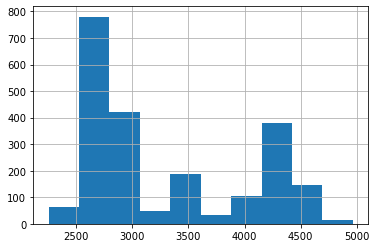

In [9]:
series.hist()

<AxesSubplot:ylabel='Density'>

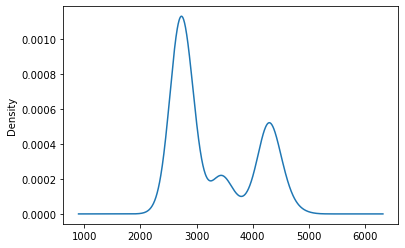

In [10]:
series.plot(kind='kde')

<AxesSubplot:xlabel='date'>

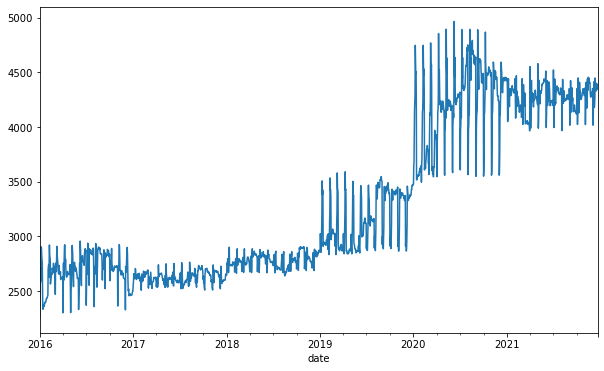

In [11]:
fig = plt.subplots(figsize = (10,6))
series.plot()

Insight: Trend is Upward or Postive

<AxesSubplot:xlabel='date'>

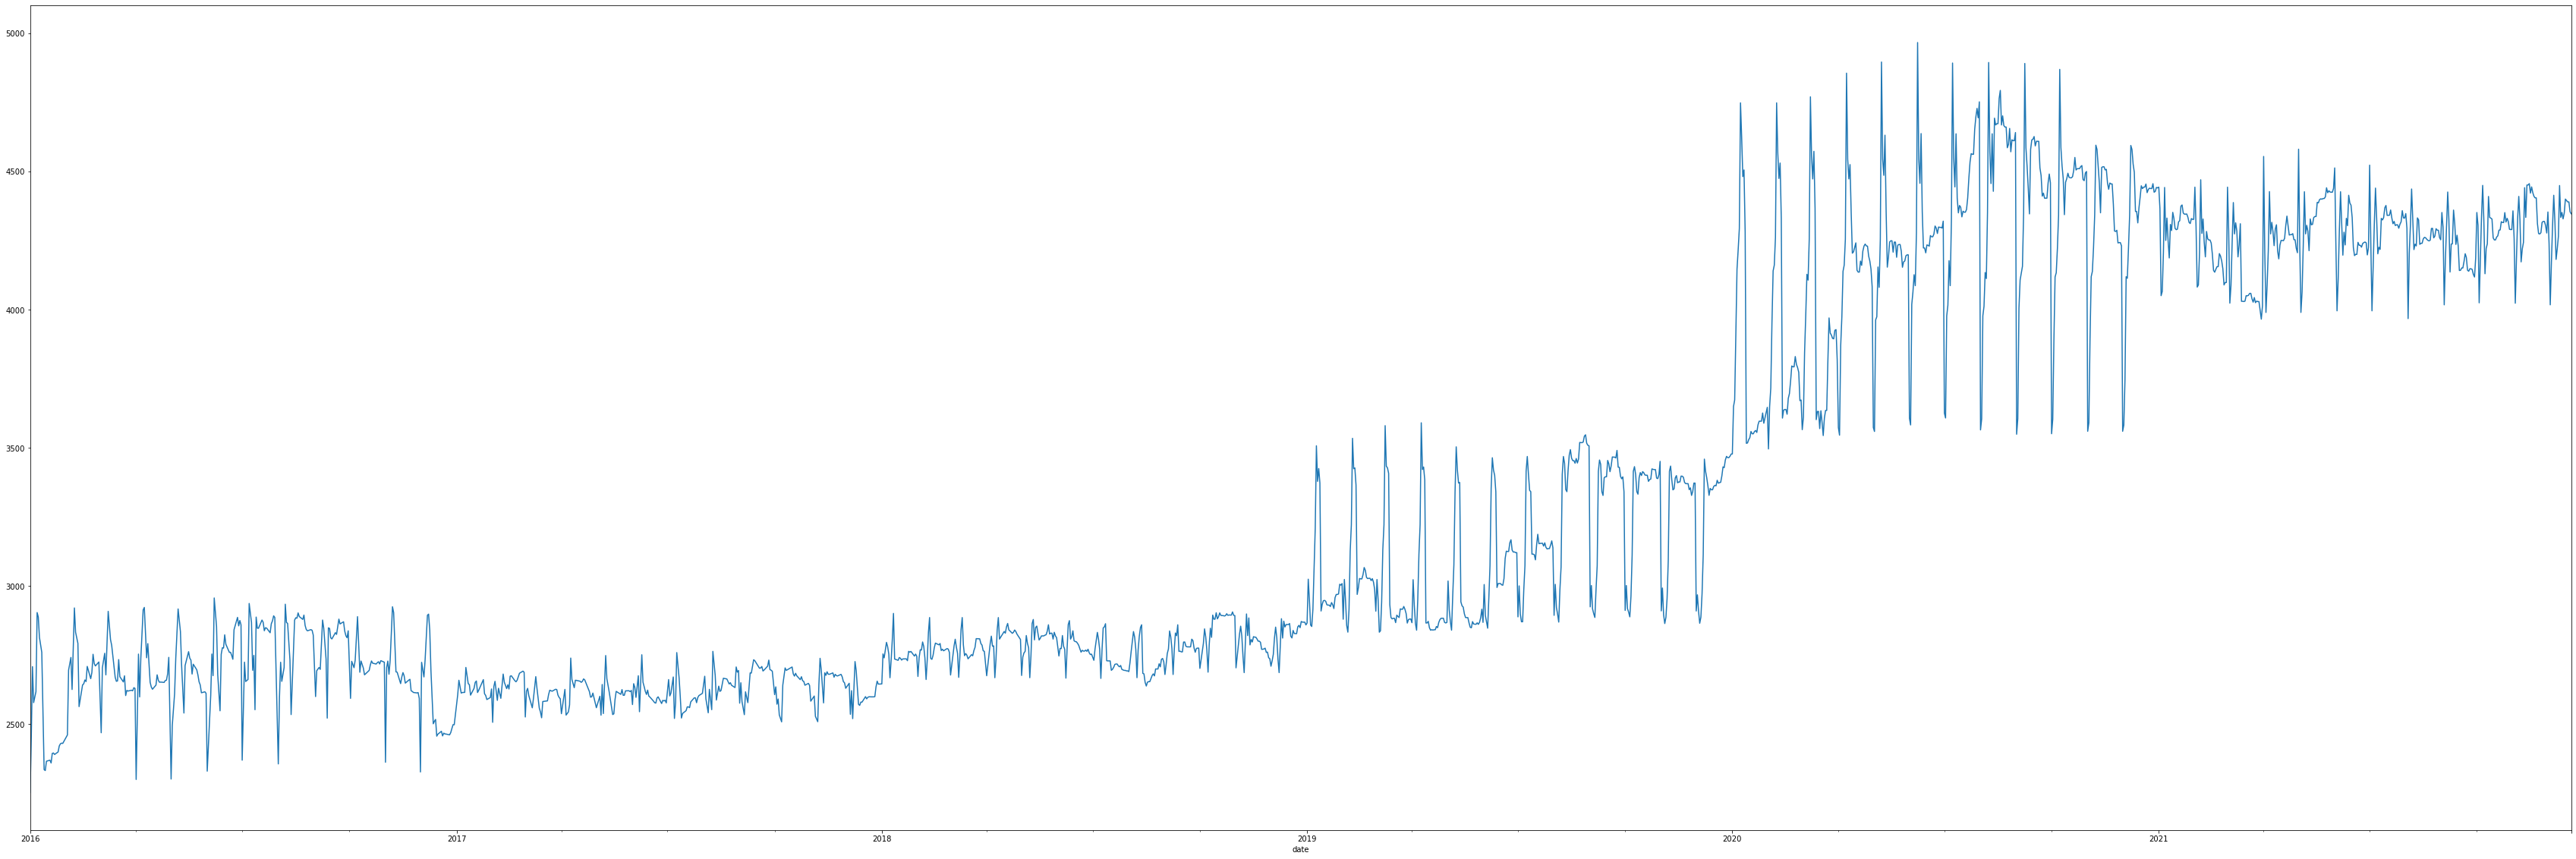

In [12]:
fig = plt.subplots(figsize = (60,20))
series.plot()

Insight: Seasonality can be observed a little bit

<AxesSubplot:xlabel='date', ylabel='price'>

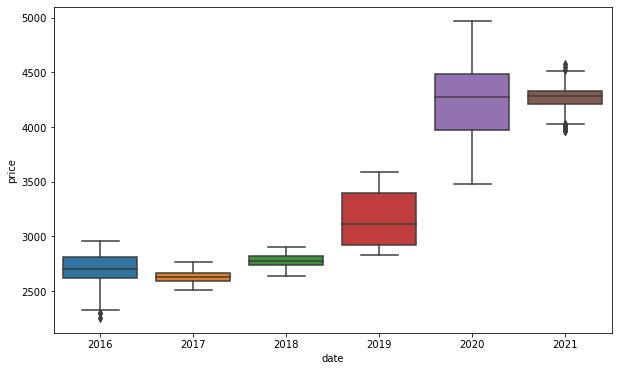

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(series.index.year, series, ax=ax)

Insight: The grwth in price has much more of an exponential growth 

##### OBSERVE CORRELATIONS BETWEEN VARIABLES AND VISUALIZE HEAT MAP

In [14]:
# since the data is univariate we cannot compare between two variables.
# so we neeed to look into the Lag plot which is nothing but the plotting of value against its lagged value

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

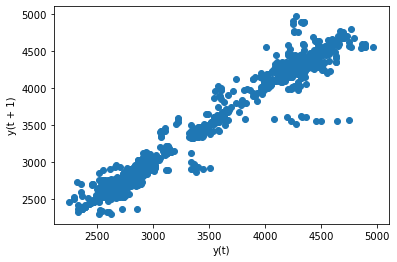

In [15]:
from pandas.plotting import lag_plot
lag_plot(series,lag=1)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

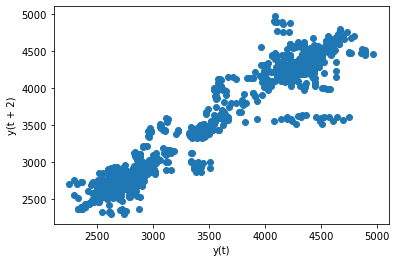

In [16]:
lag_plot(series,lag=2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

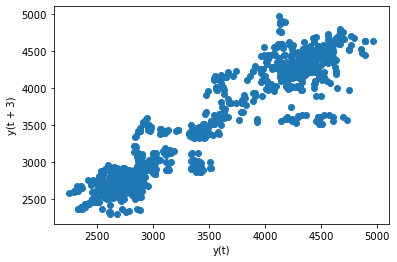

In [17]:
lag_plot(series,lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4)'>

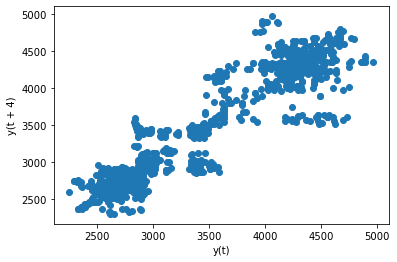

In [18]:
lag_plot(series,lag=4)

Insight : lagplot with lag 1 ,2,3 and 4 suggests the positive correlation

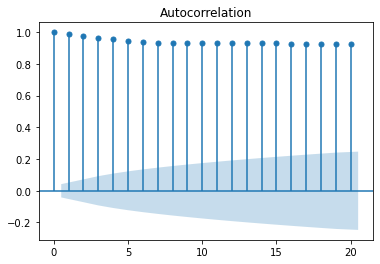

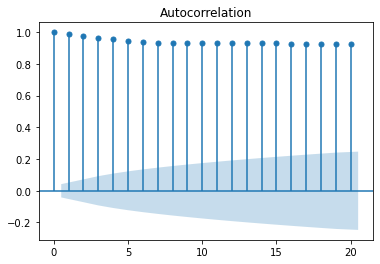

In [19]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series,lags=20)

Insight :the autocorrelation plot suggests  the immediate lags have enough significant relationship to build a good forecasting model on

In [20]:
# to seee the heat map we need to process the data a lil bit
df['price']=round(df['price'])
df['Year']=df['date'].dt.year
df['Month_of_Year']=df['date'].dt.month

<AxesSubplot:xlabel='Month_of_Year', ylabel='Year'>

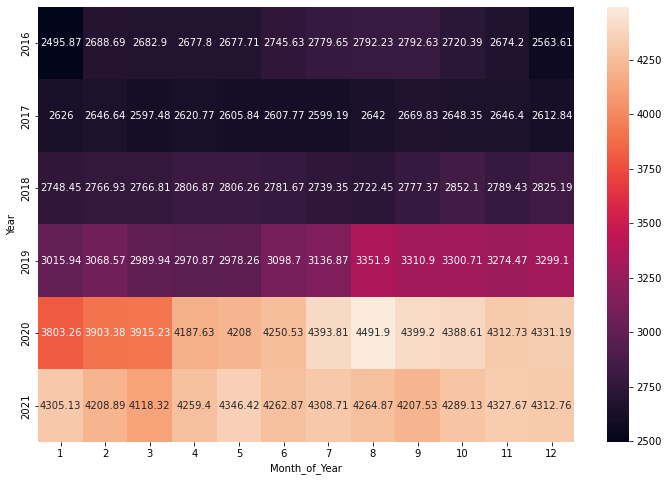

In [21]:
#lets see Heat map visualization of the data on monthly of each year
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="price",index="Year",columns="Month_of_Year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='Year', ylabel='price'>

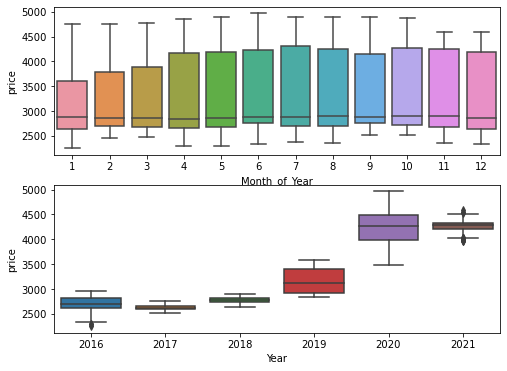

In [22]:
# Boxplot for every month throughtout all the years
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month_of_Year",y="price",data=df)
plt.subplot(212)
sns.boxplot(x="Year",y="price",data=df)


#### Moving Average to Find out any visible trend


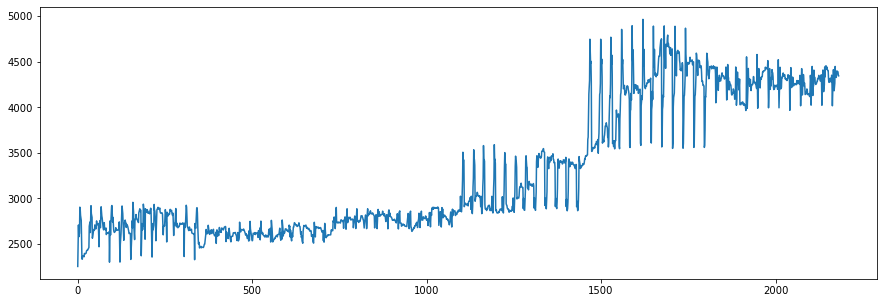

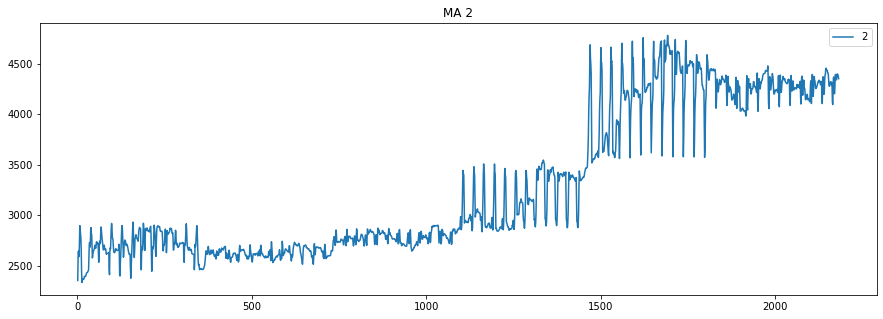

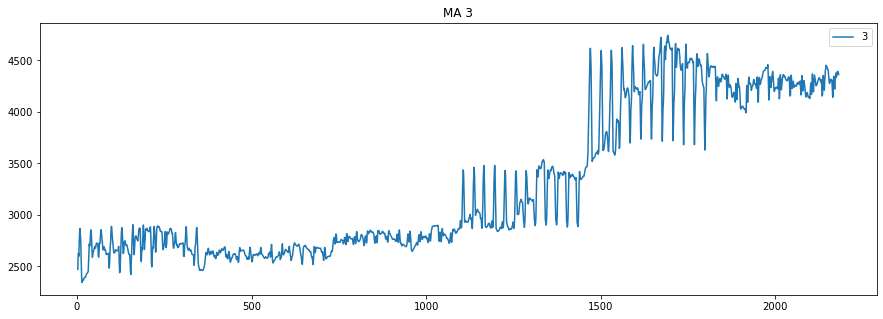

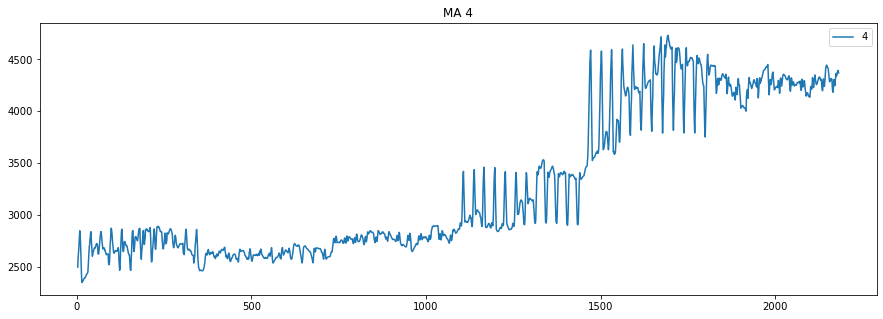

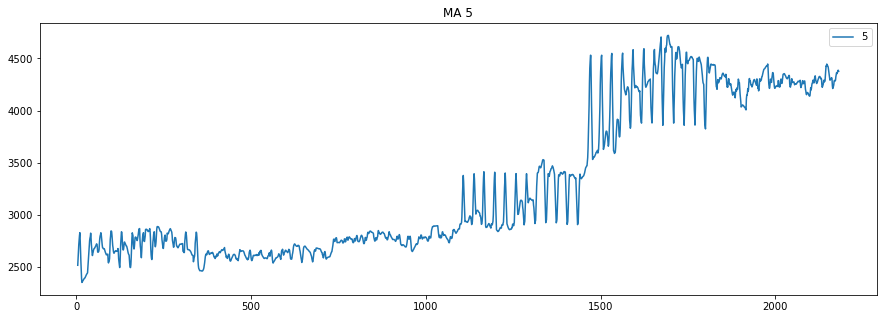

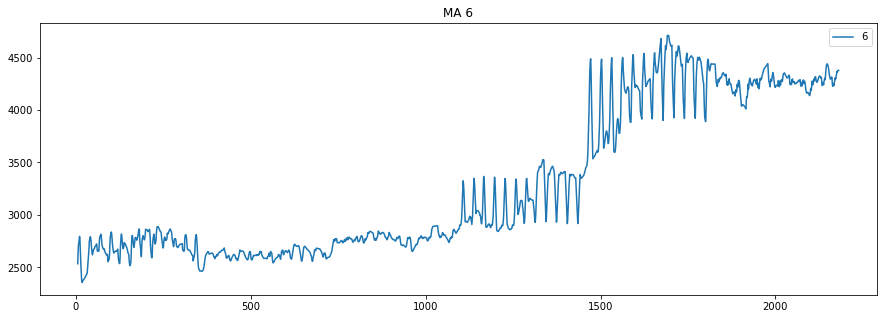

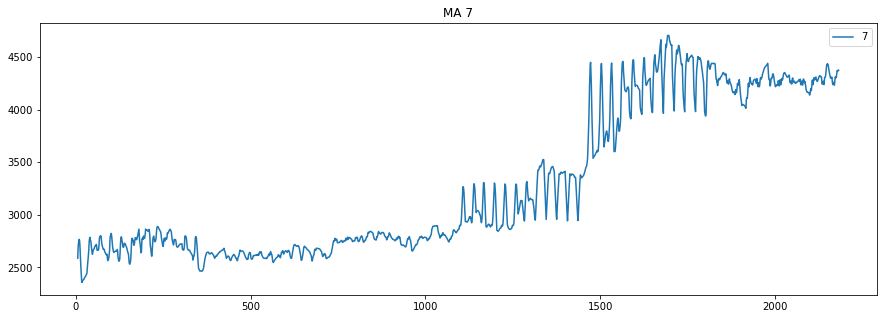

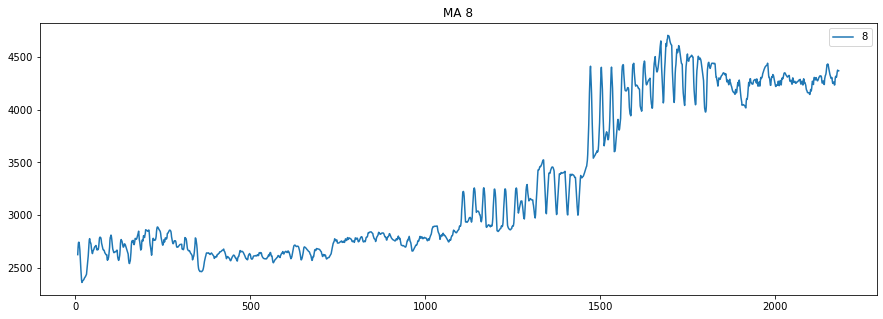

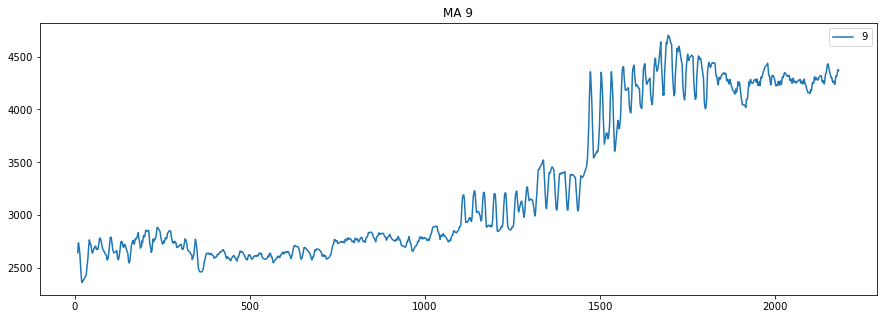

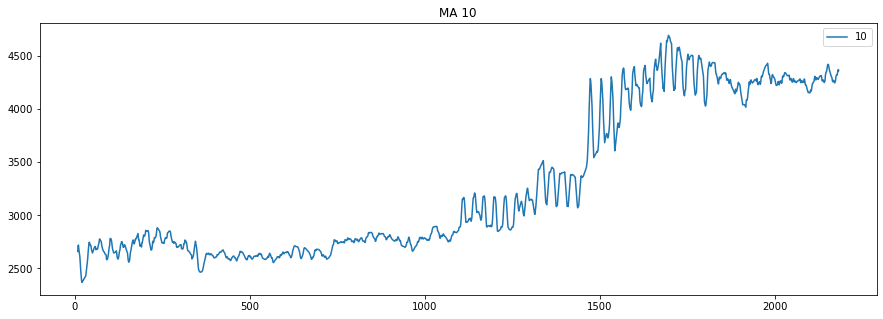

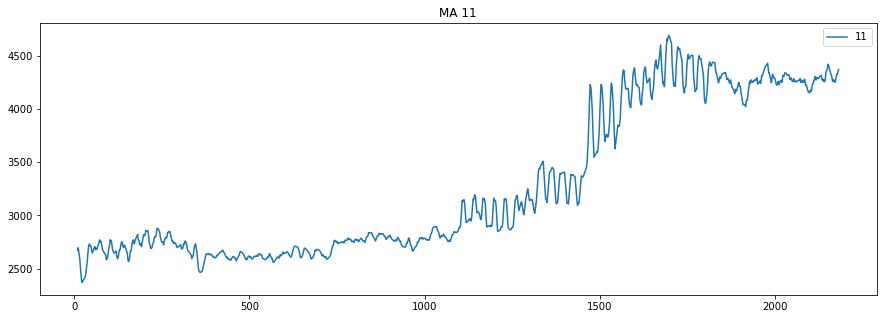

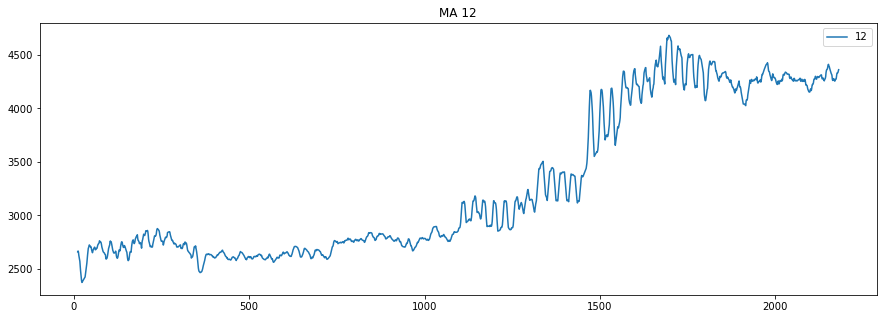

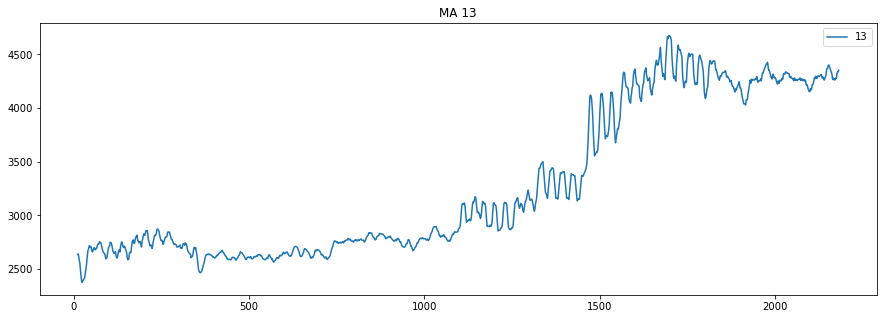

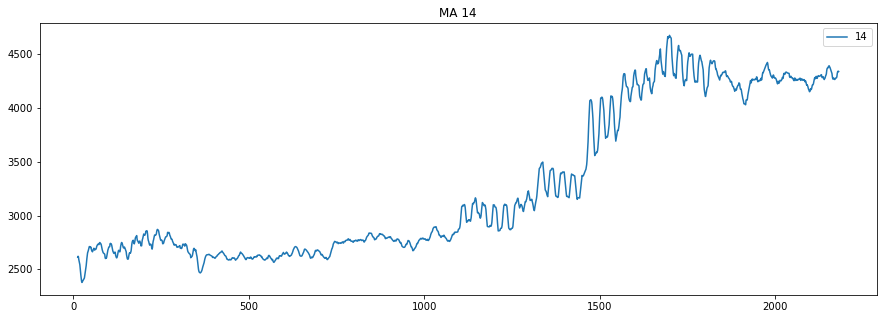

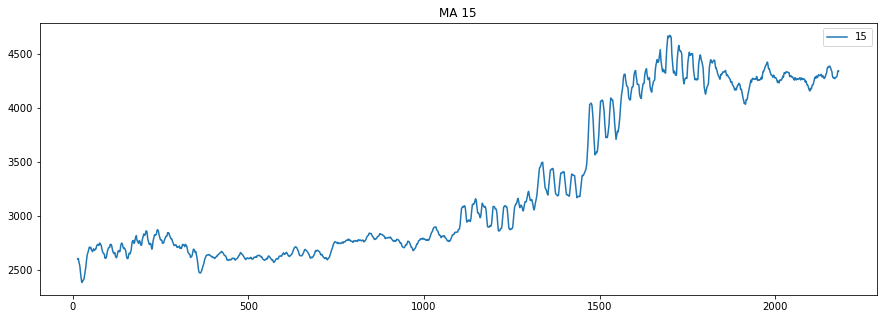

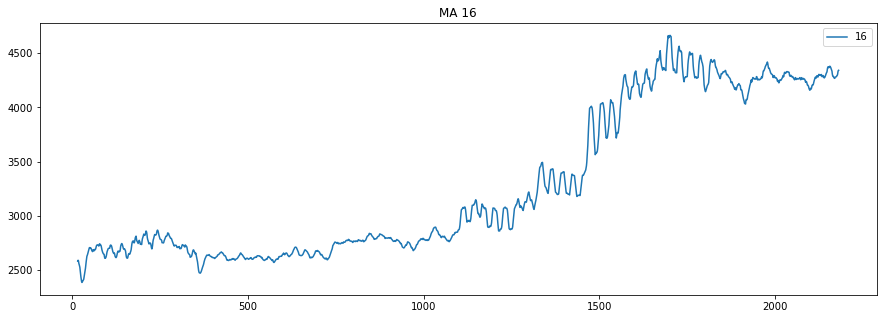

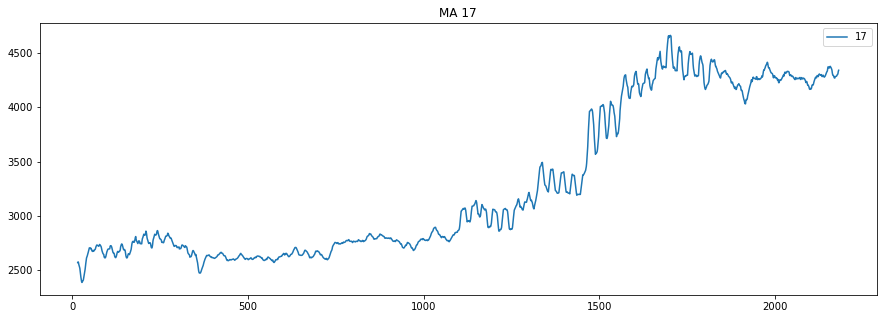

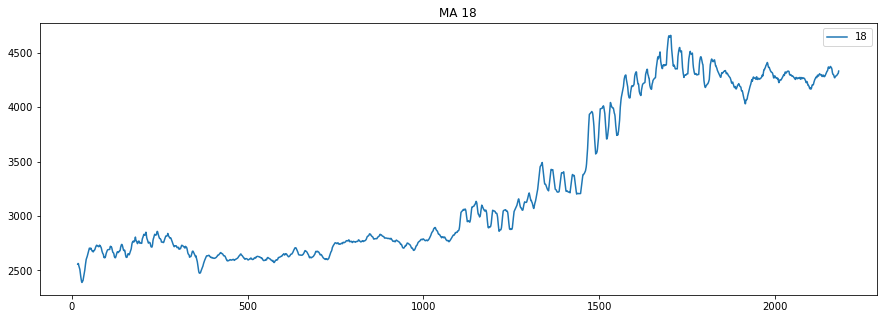

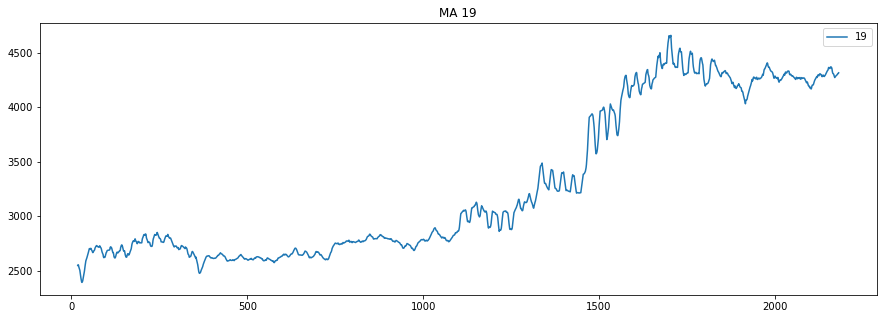

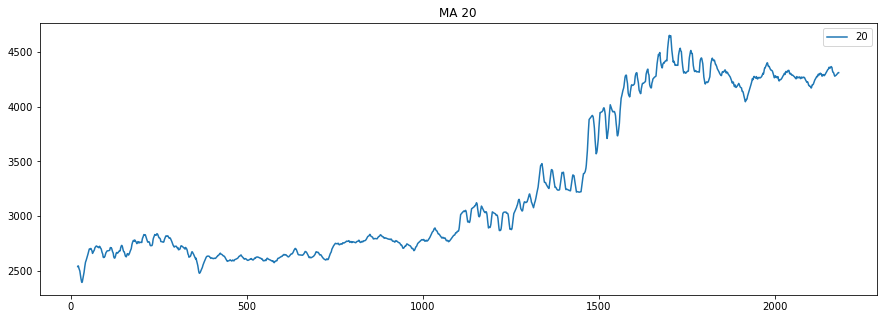

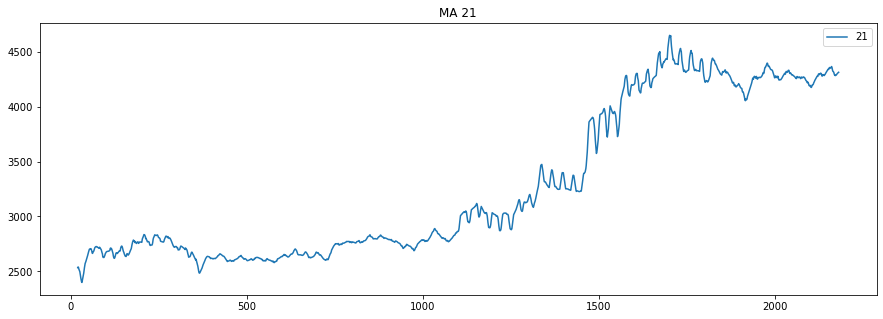

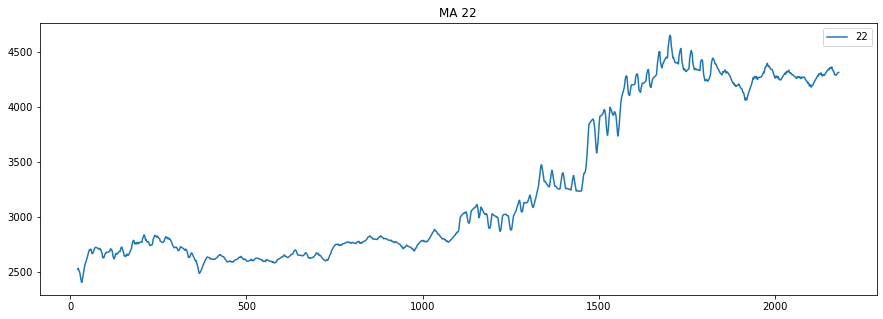

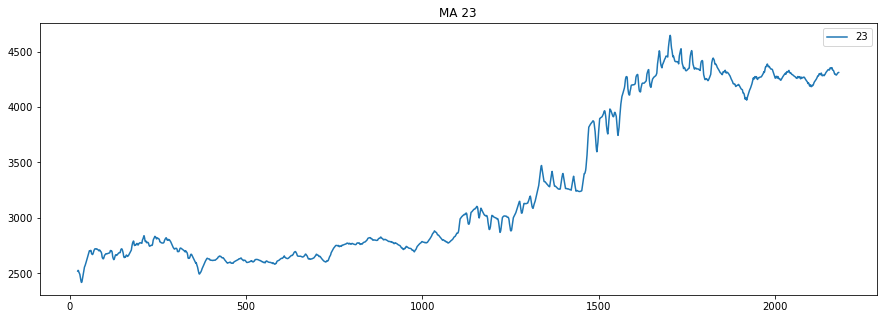

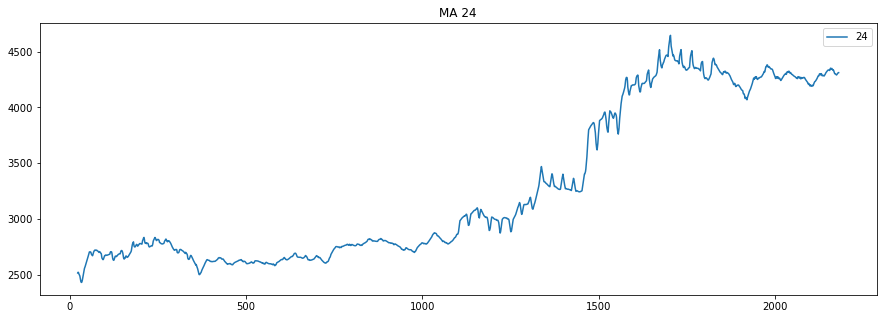

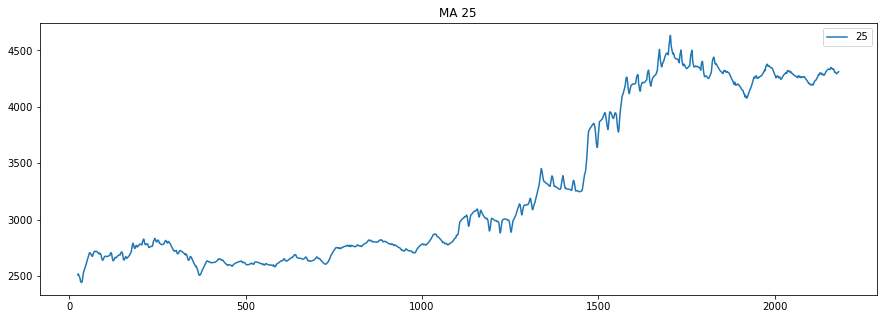

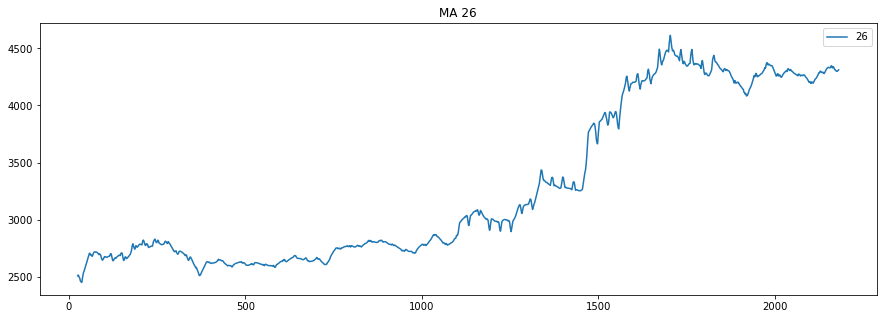

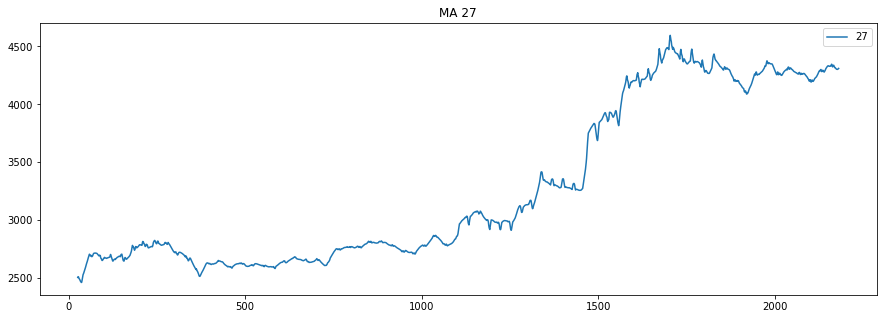

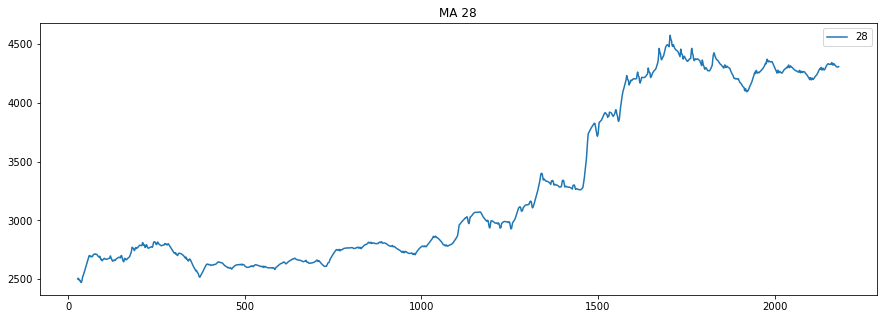

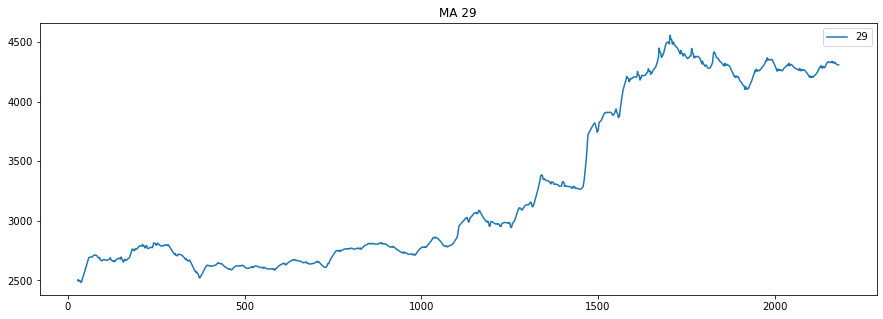

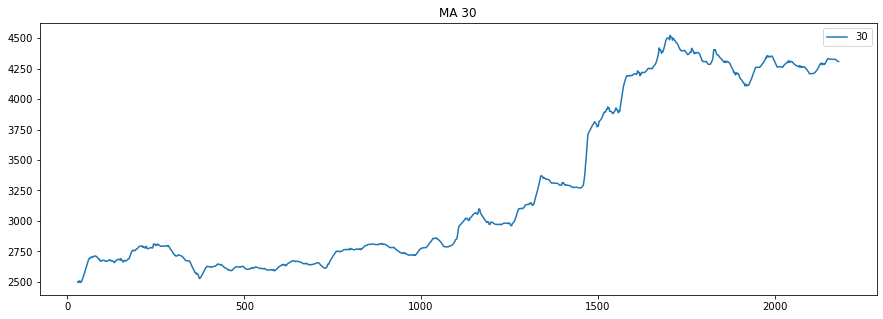

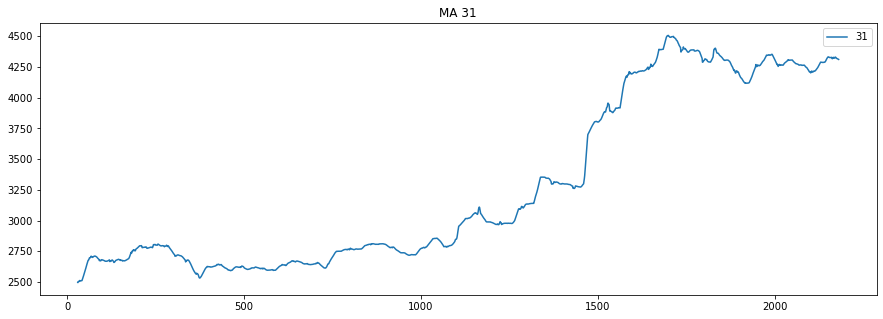

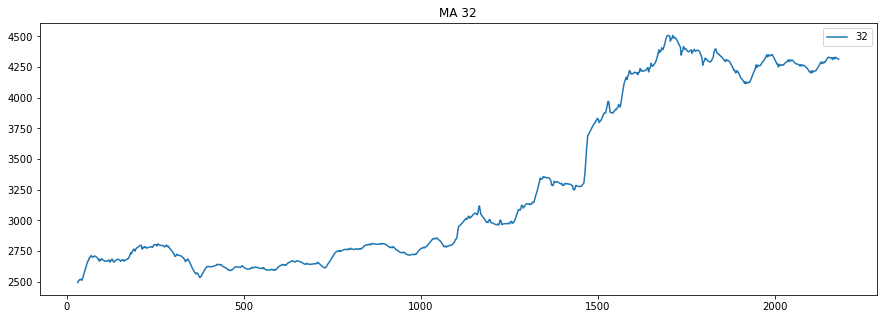

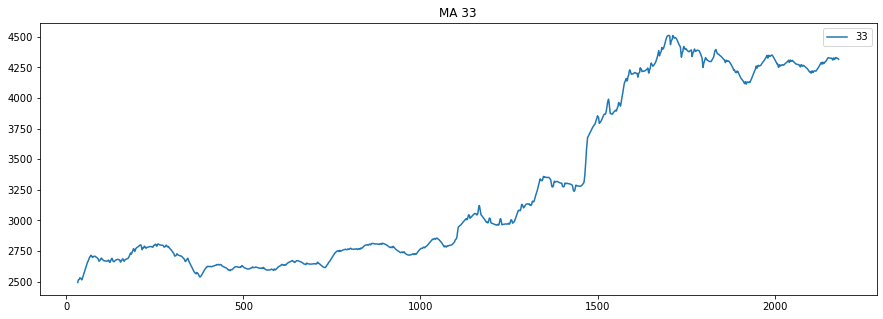

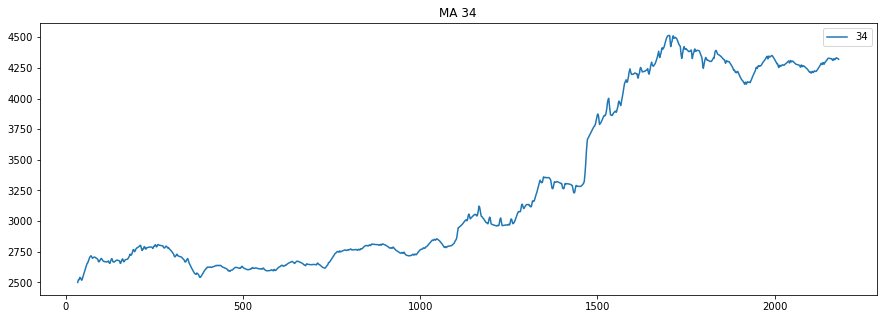

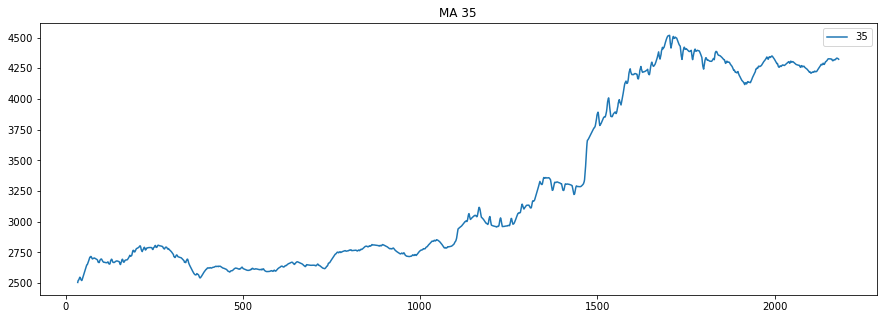

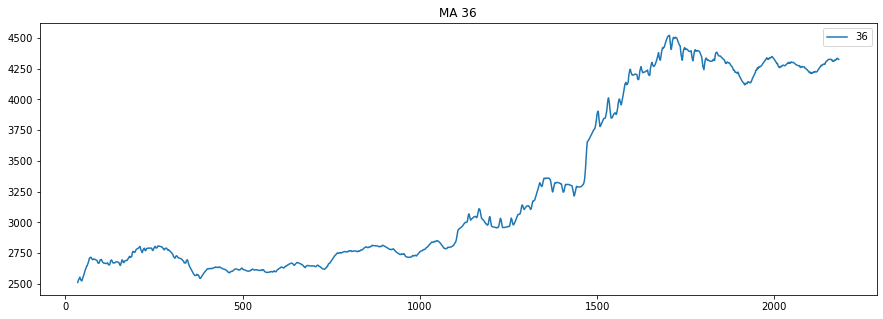

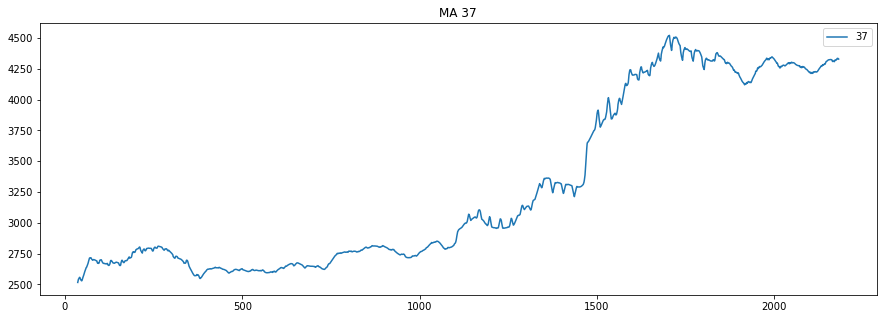

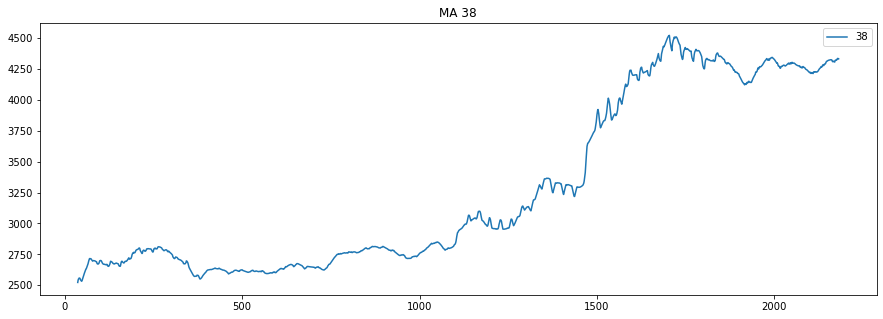

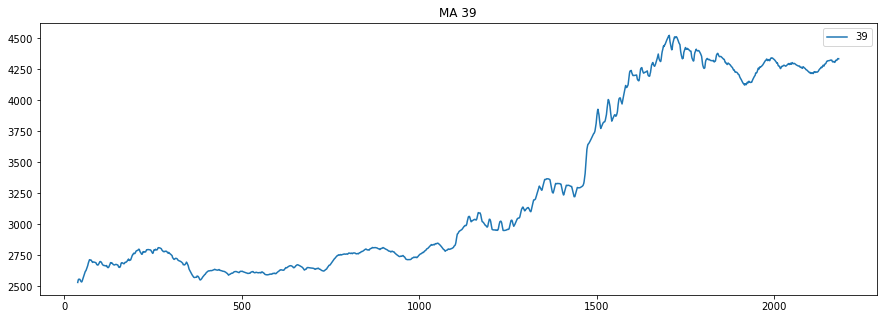

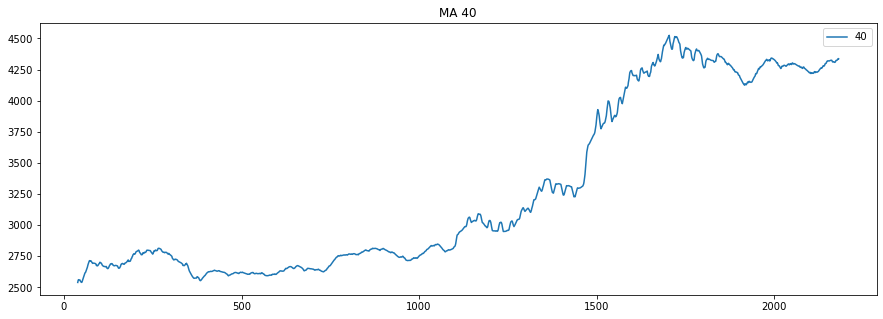

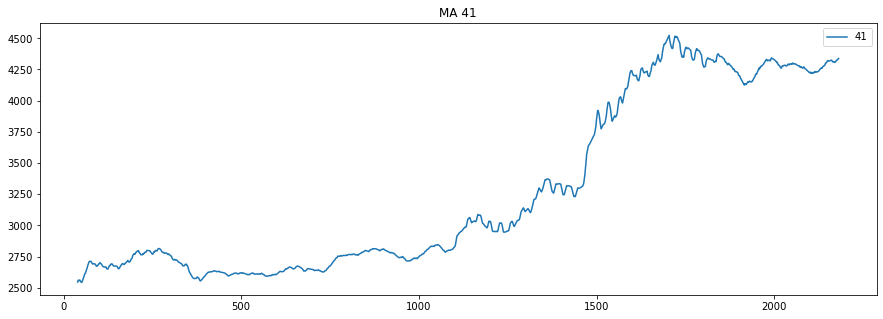

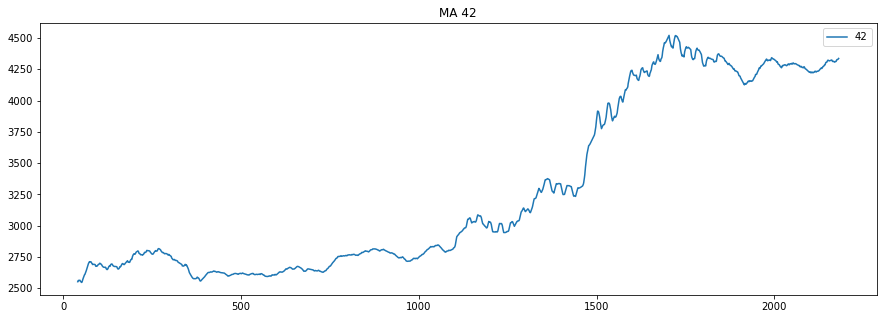

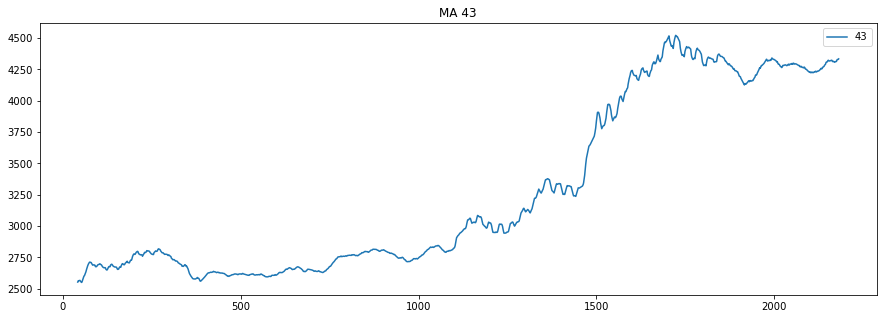

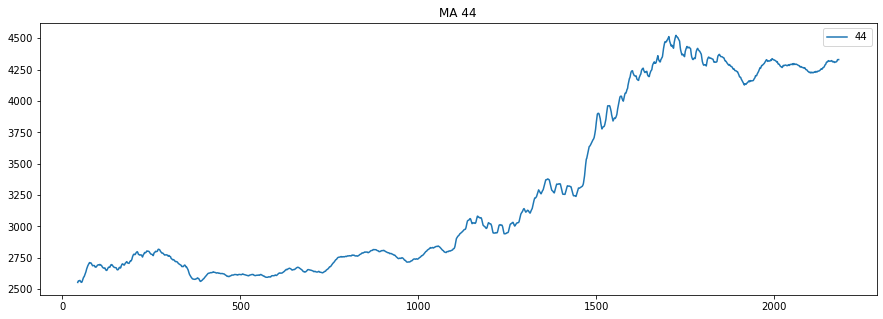

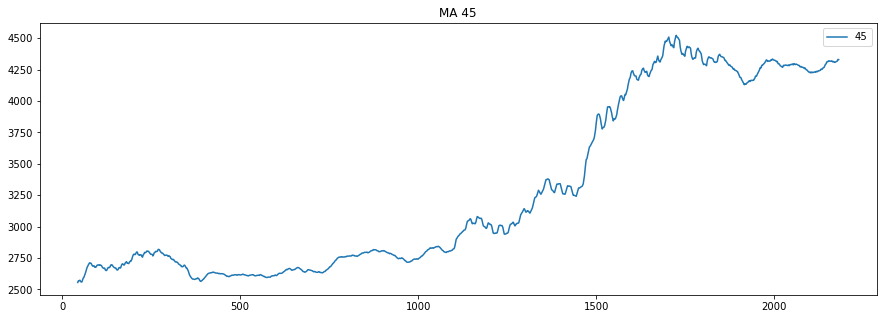

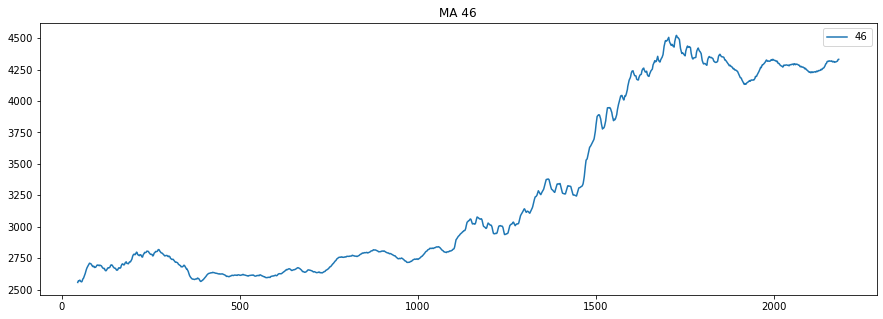

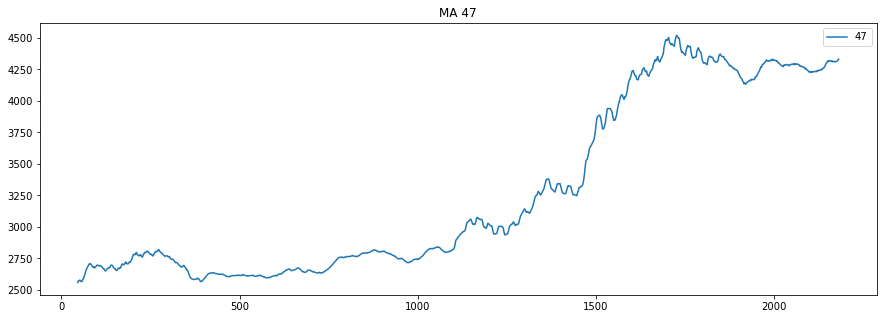

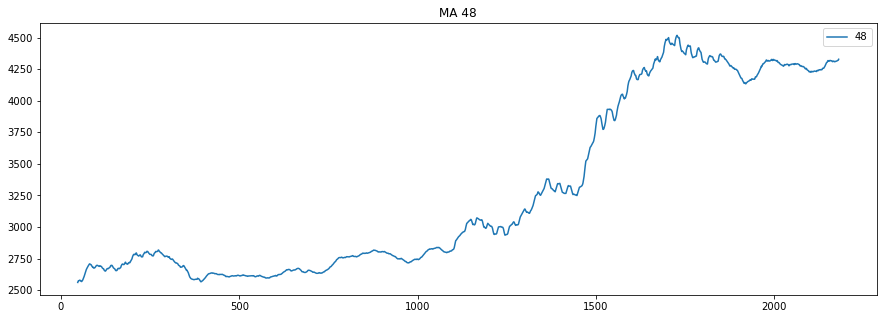

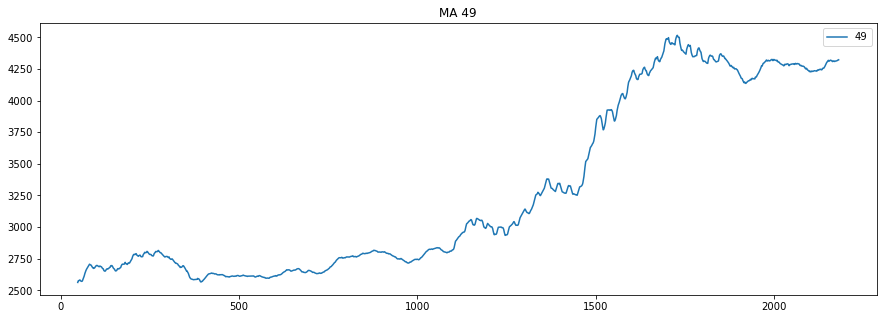

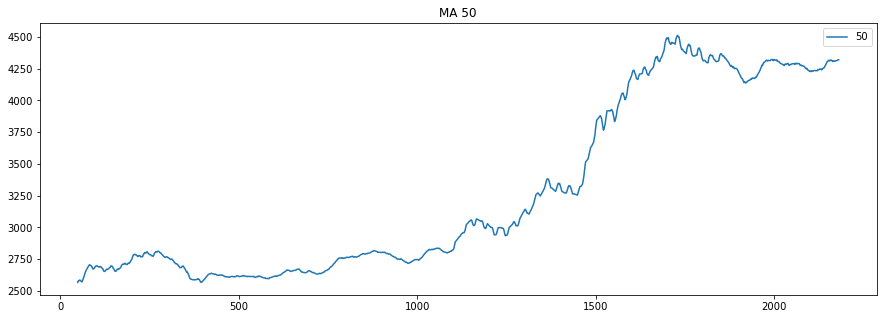

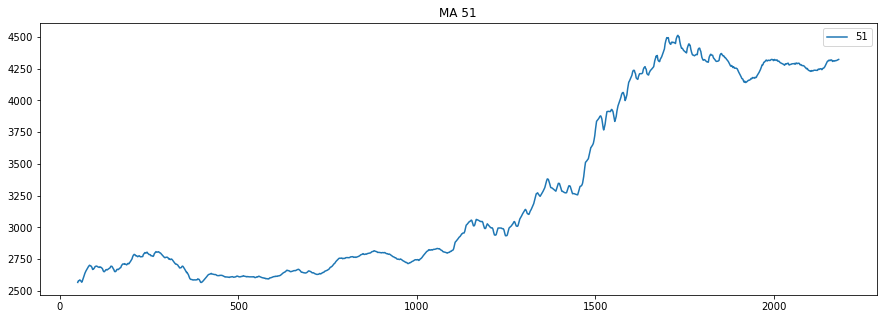

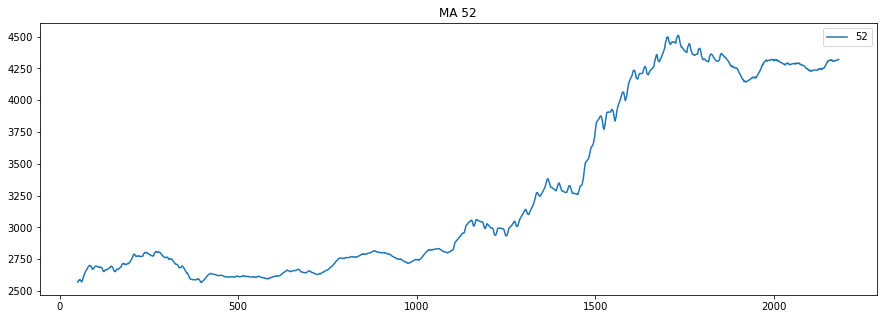

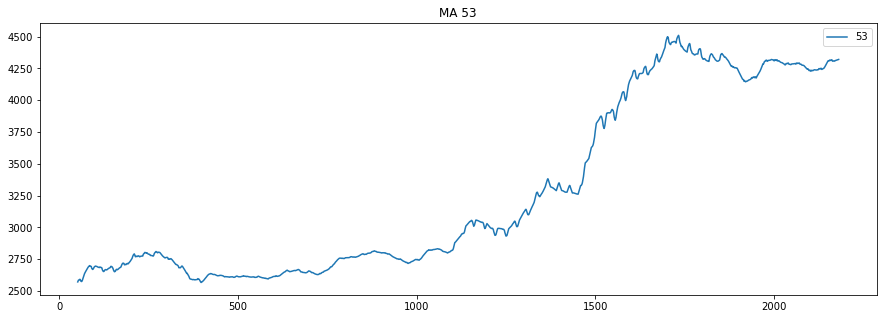

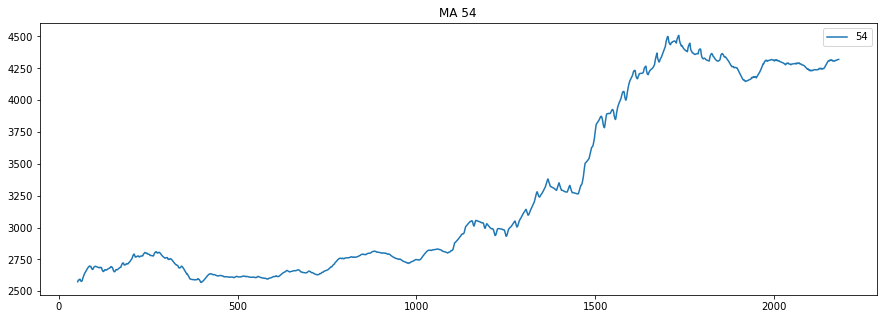

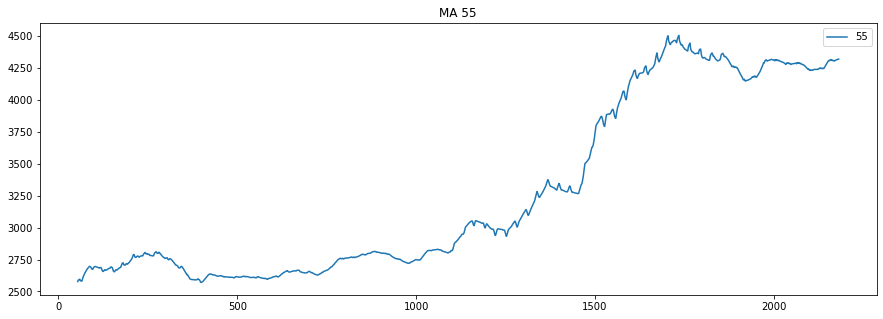

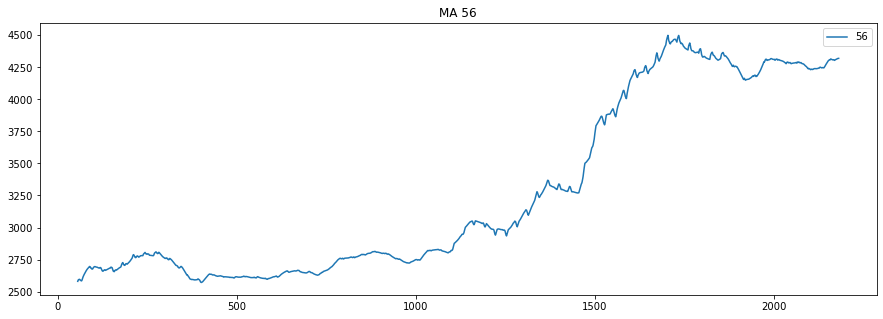

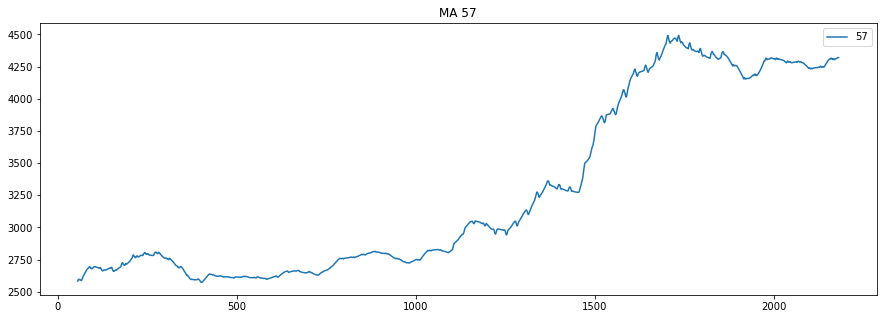

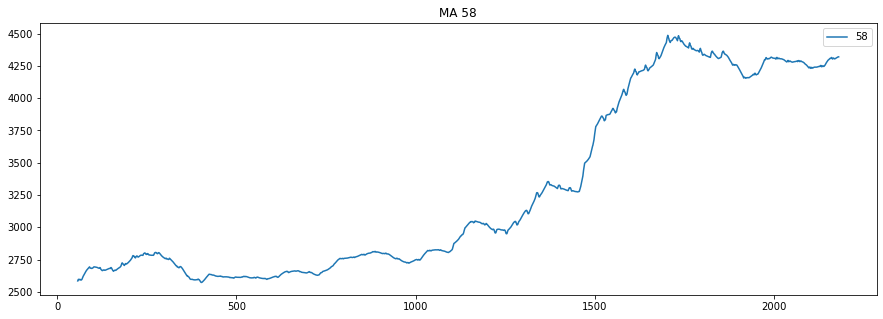

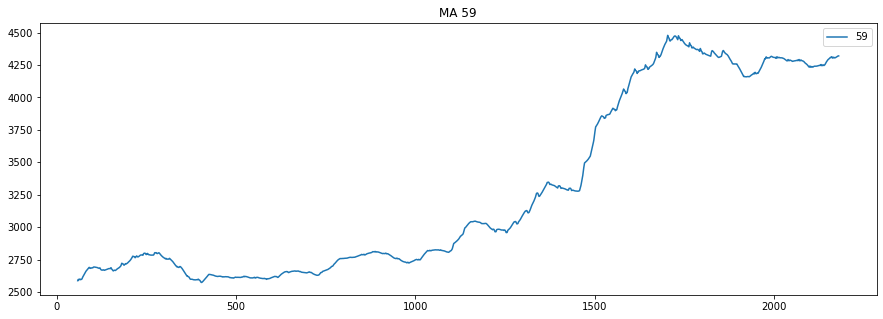

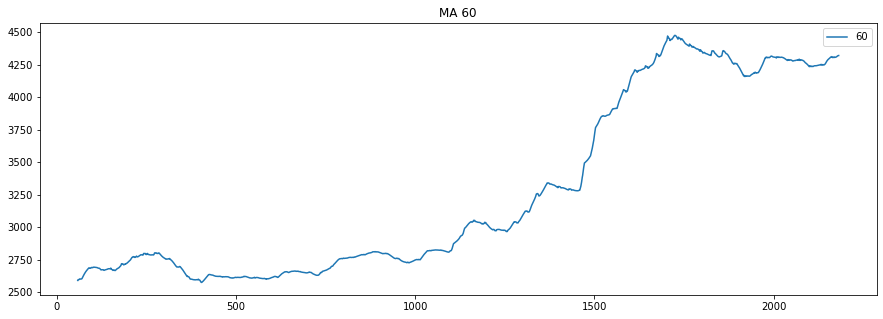

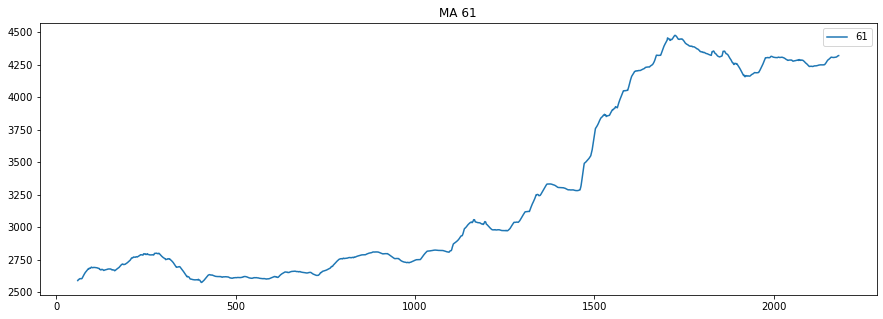

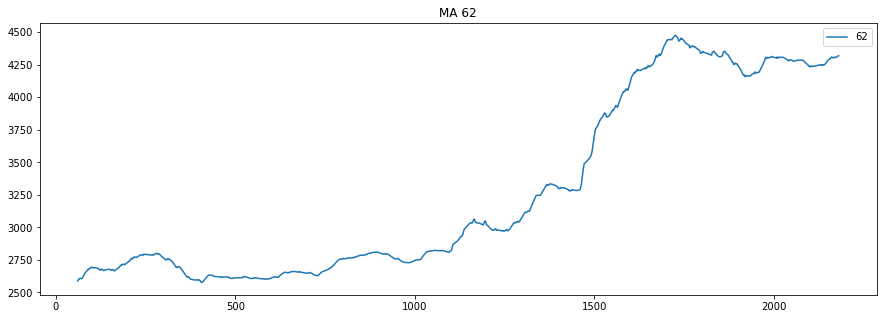

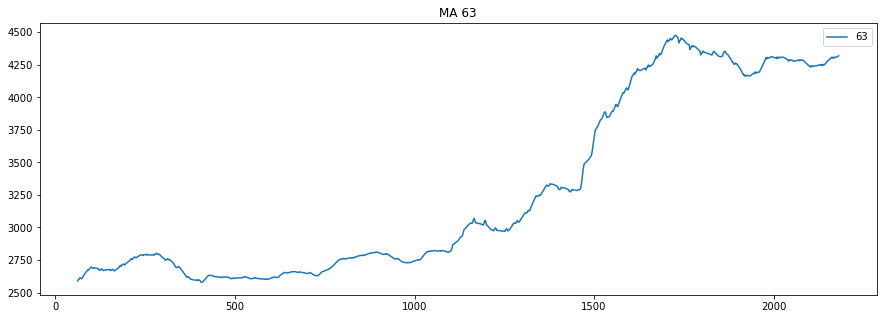

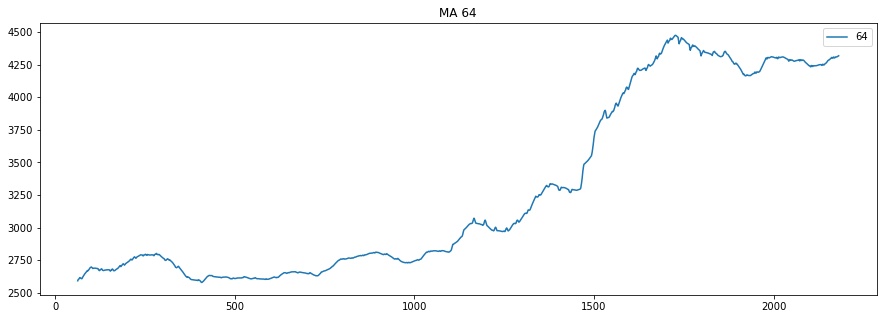

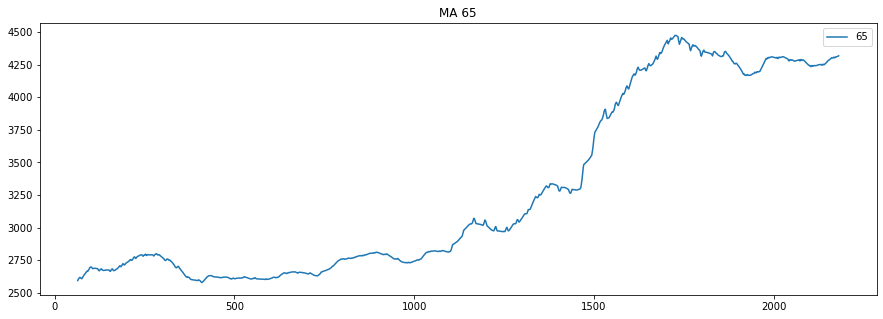

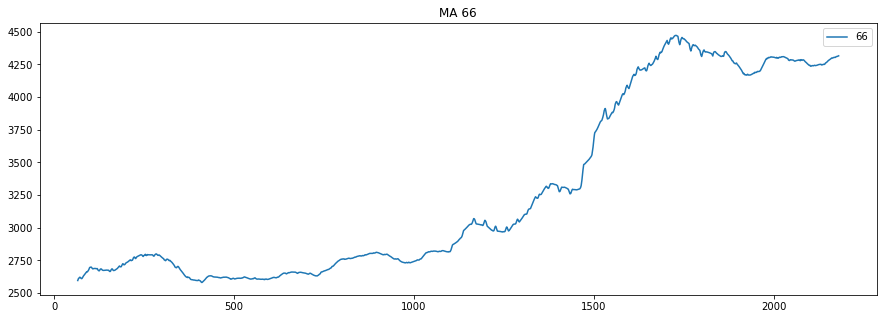

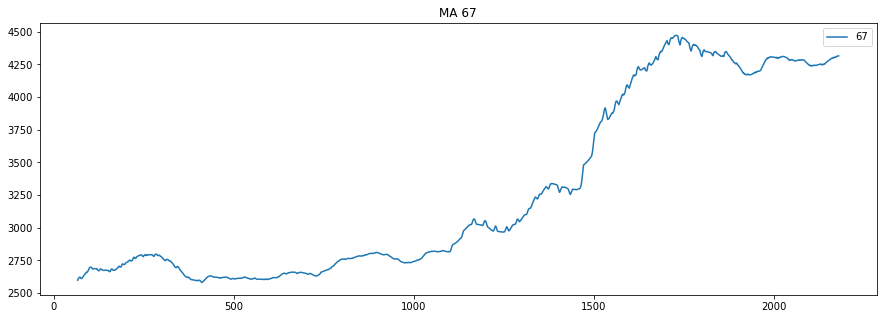

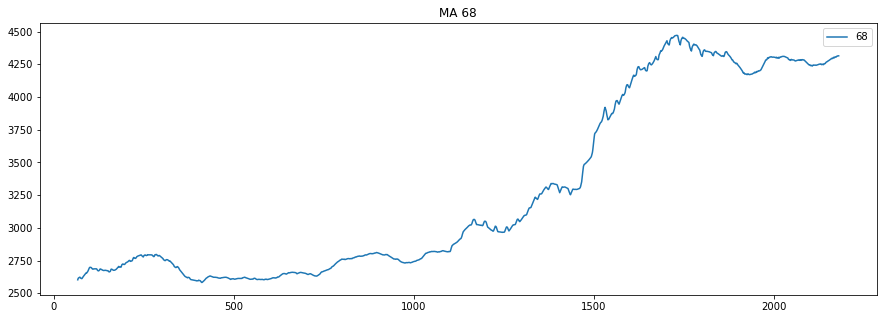

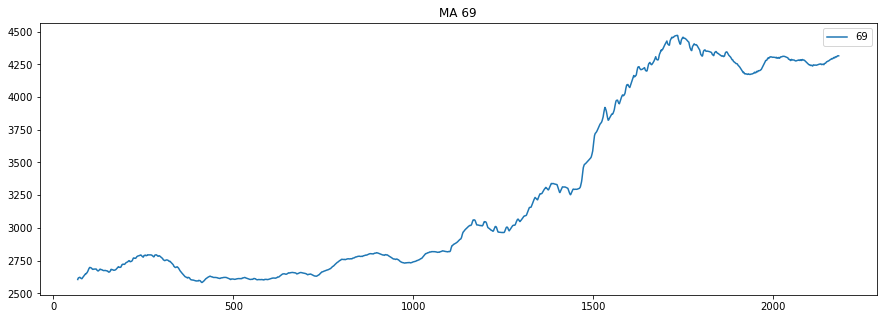

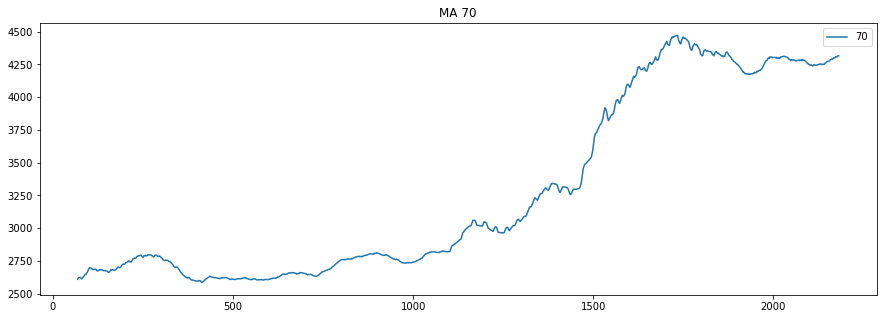

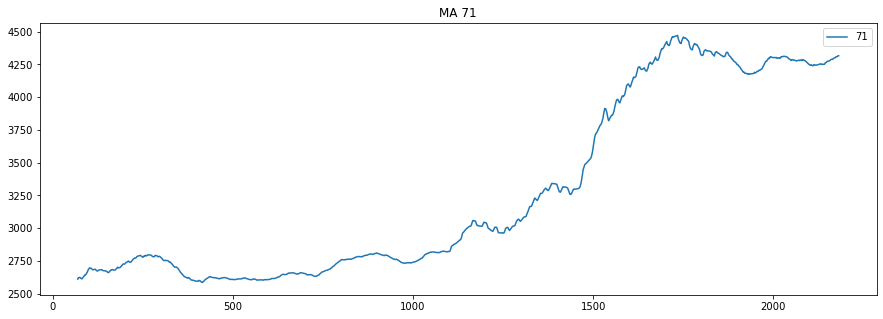

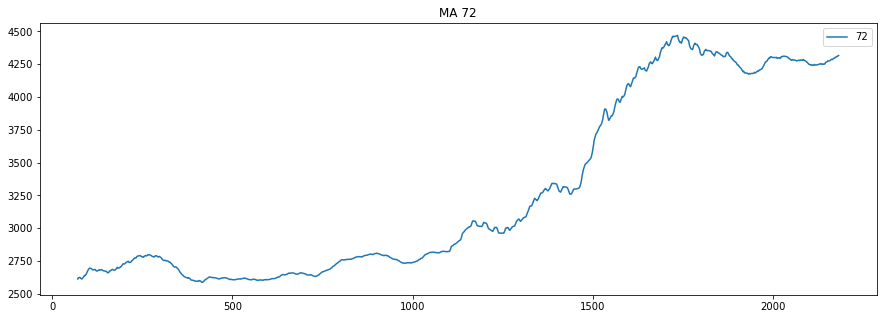

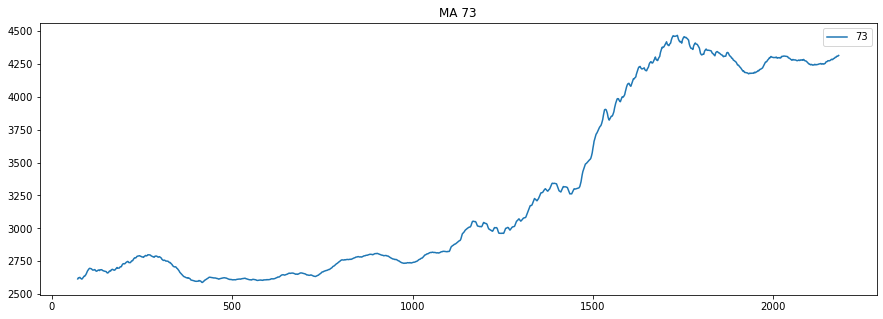

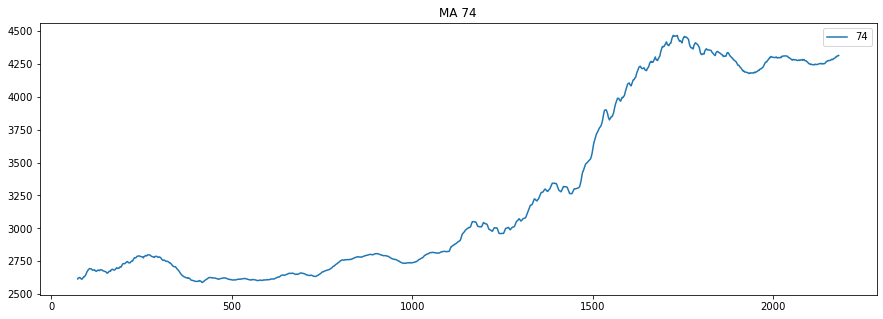

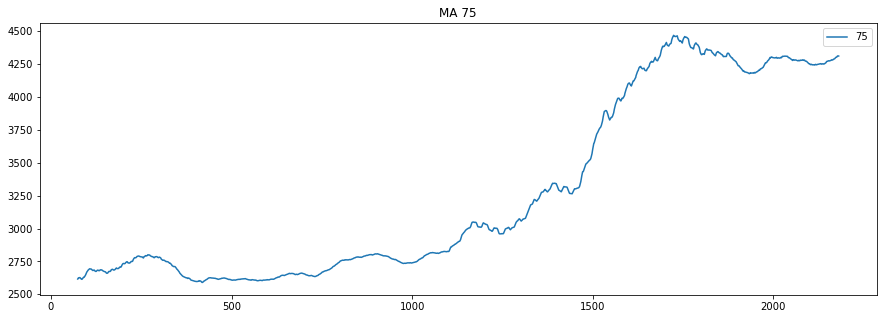

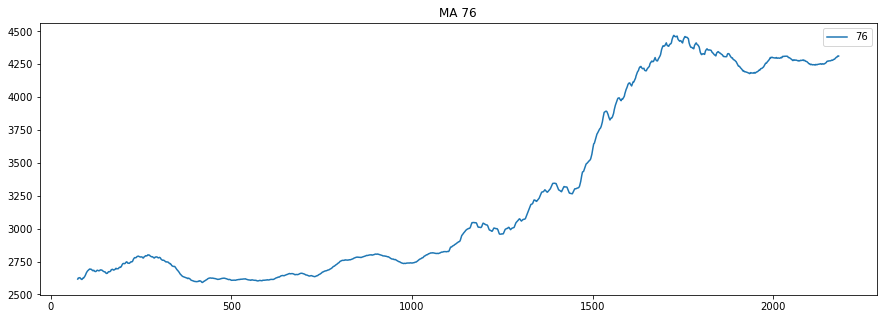

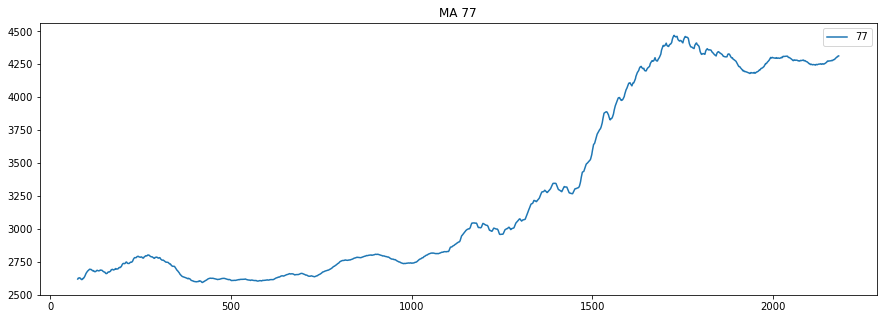

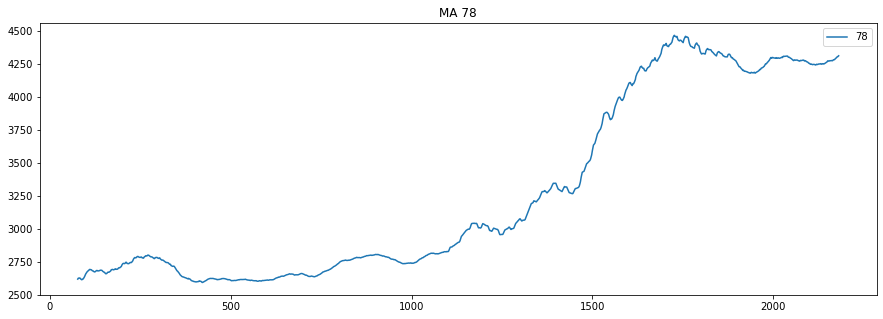

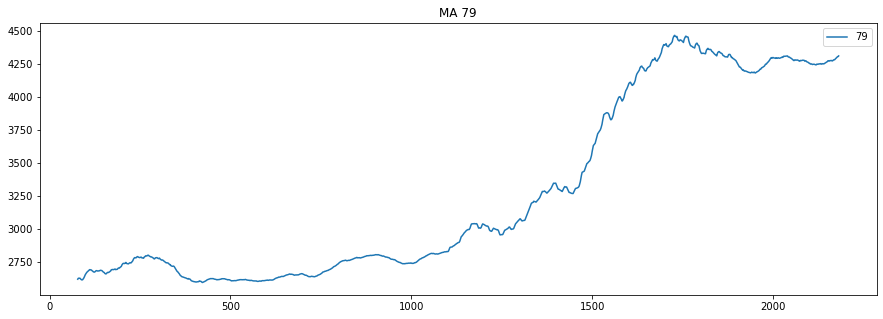

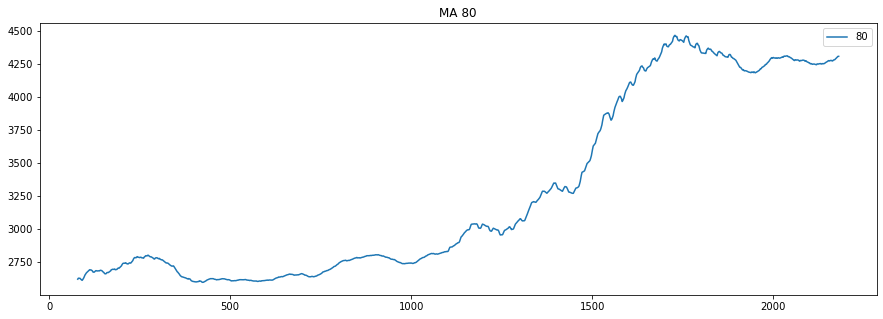

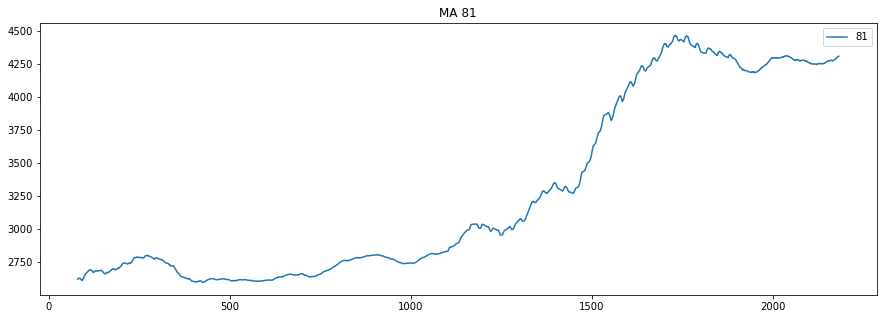

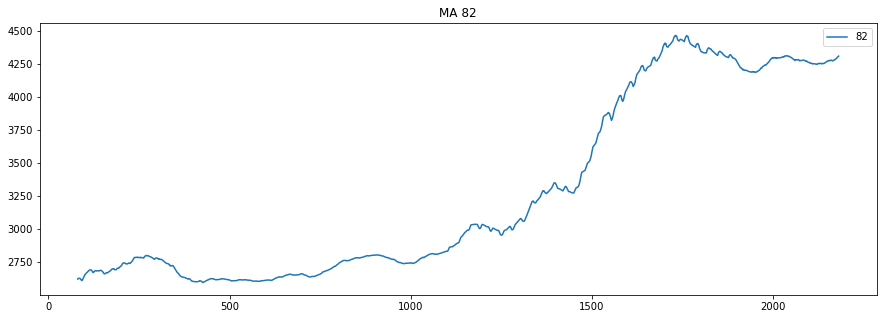

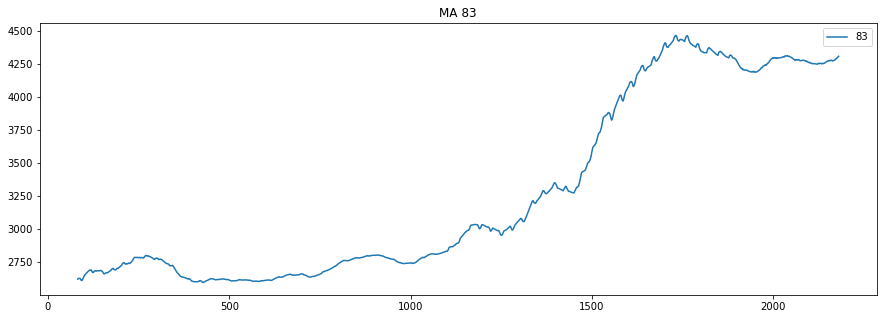

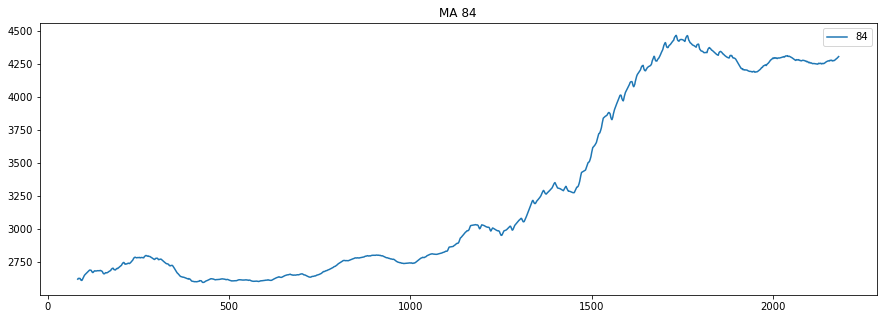

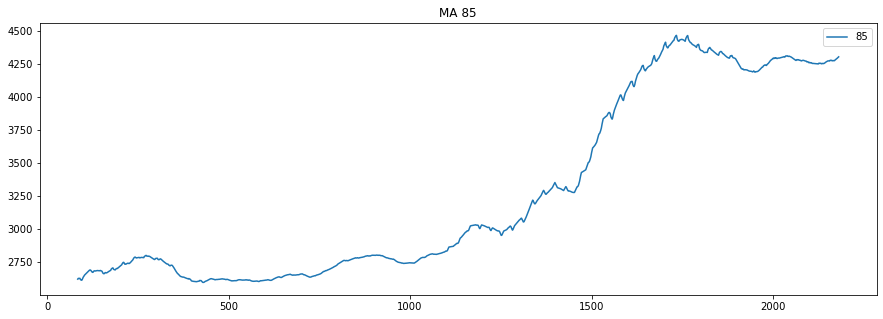

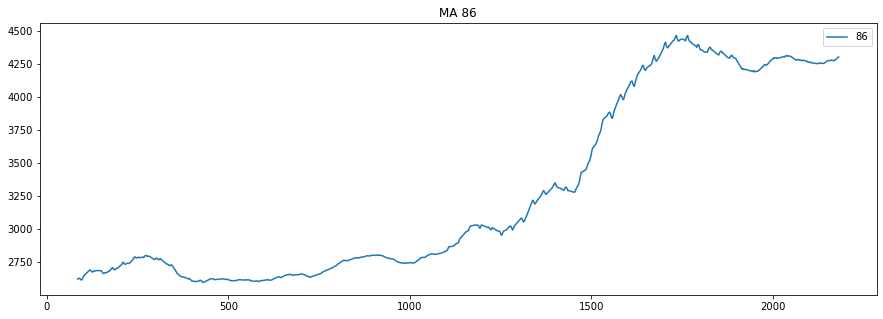

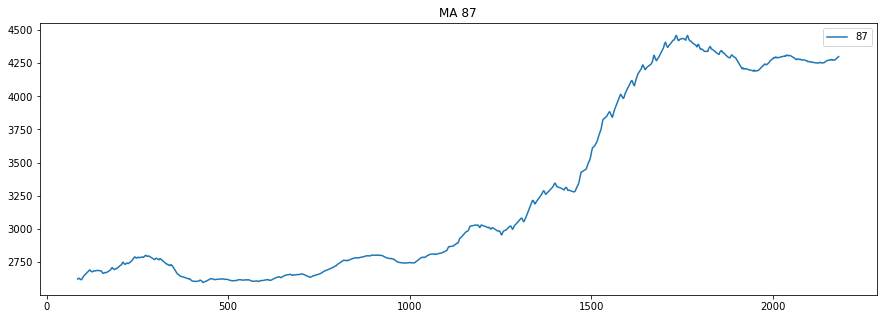

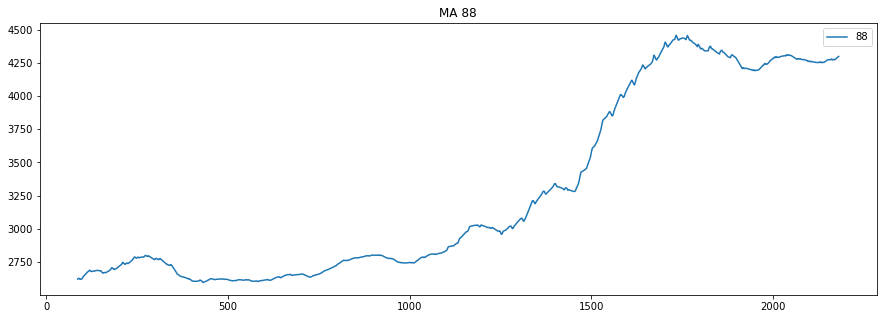

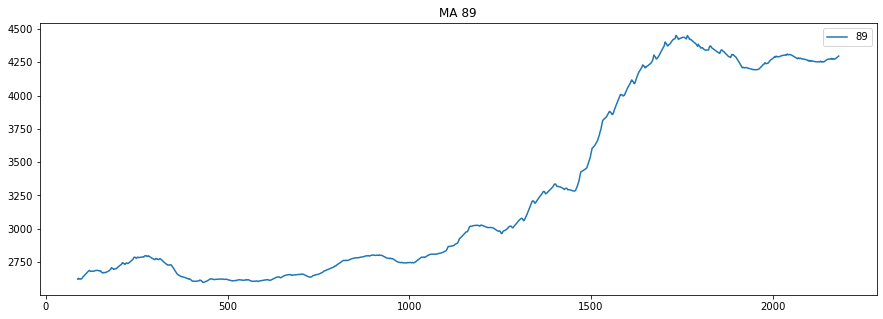

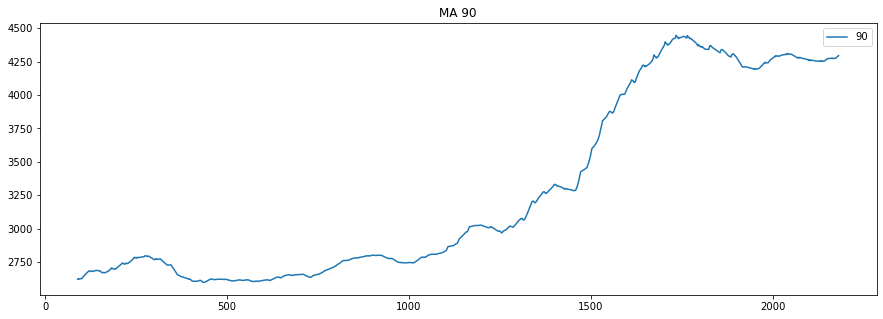

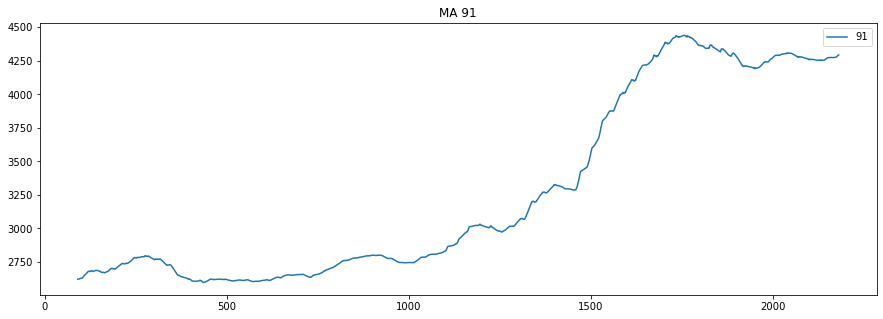

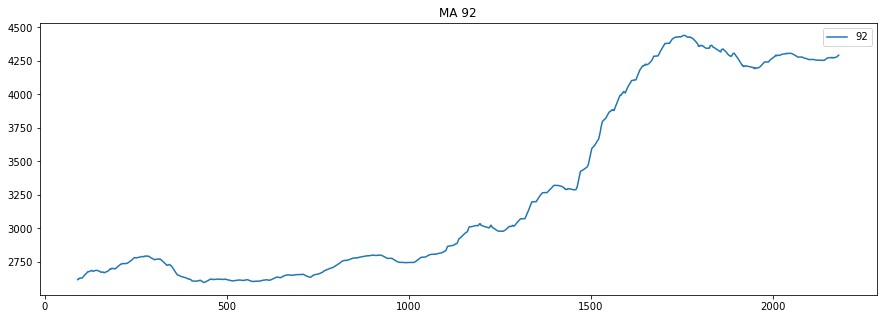

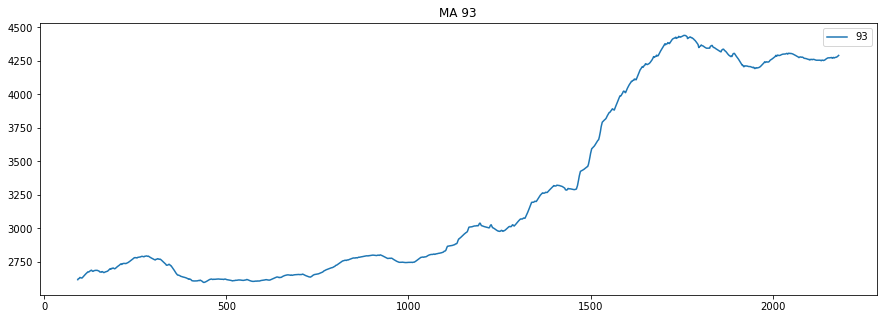

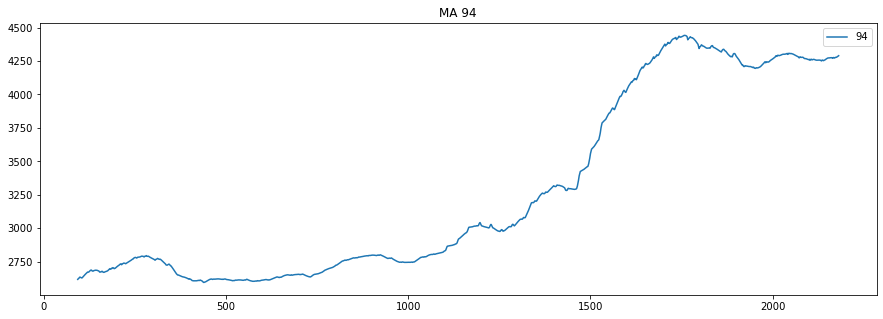

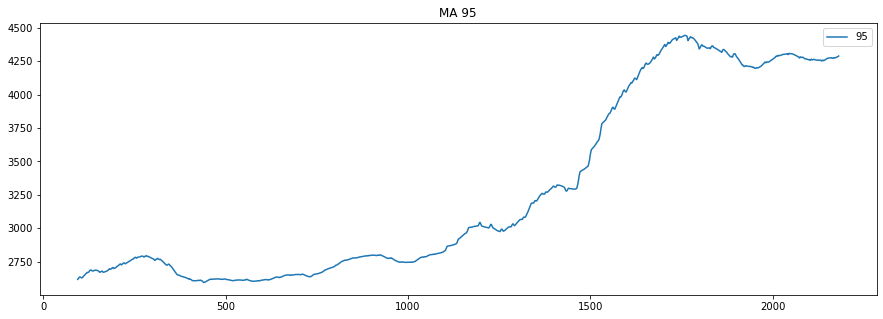

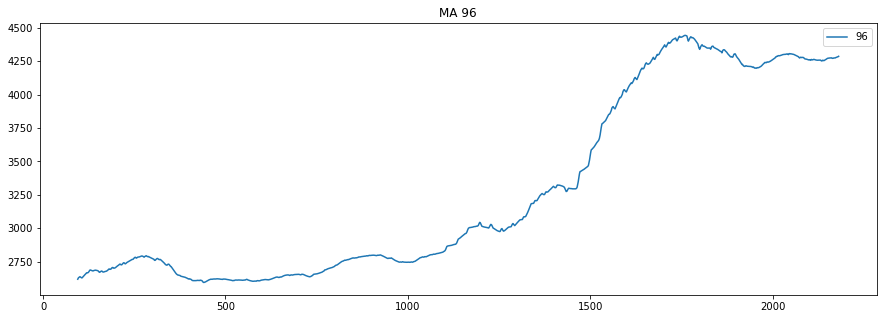

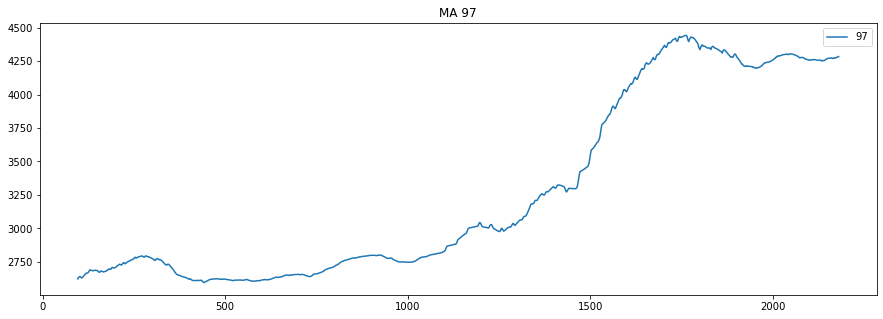

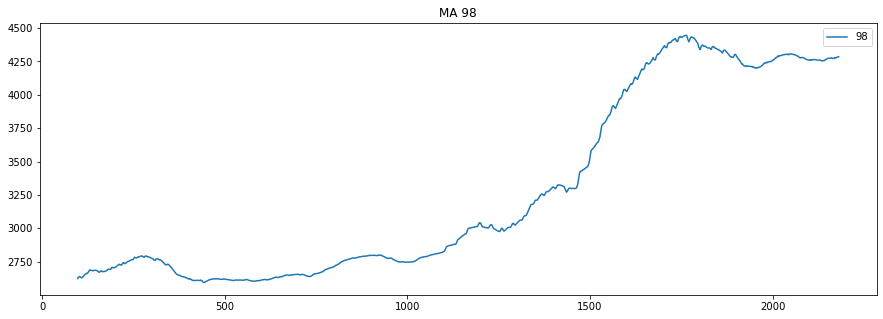

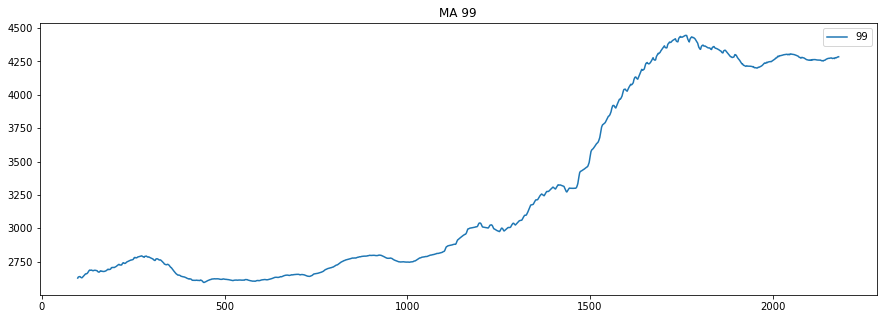

In [23]:
plt.figure(figsize=(15,5))
df.price.plot(label='org')
for i in range(2,100):
    plt.figure(figsize=(15,5))
    df['price'].rolling(i).mean().plot(label=str(i))
    plt.title('MA '+str(i))
    plt.legend(loc='best')
    plt.show()

### Time Series Decomposition PLot
- to find the clear trend
- to find the seasonality (additive or multiplicative)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

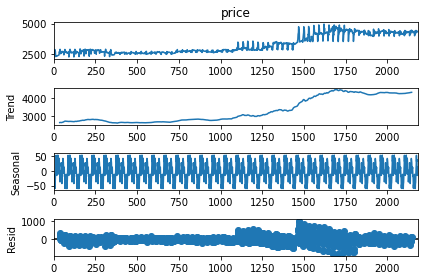

In [25]:
decompose_ts_add = seasonal_decompose(df['price'],  period = 72)
decompose_ts_add.plot()
plt.show()

### 4.PREPROCESS DATA

In [26]:
df

date   price  Year  Month_of_Year
0    2016-01-01  2253.0  2016              1
1    2016-01-02  2454.0  2016              1
2    2016-01-03  2708.0  2016              1
3    2016-01-04  2578.0  2016              1
4    2016-01-05  2598.0  2016              1
...         ...     ...   ...            ...
2177 2021-12-17  4394.0  2021             12
2178 2021-12-18  4390.0  2021             12
2179 2021-12-19  4390.0  2021             12
2180 2021-12-20  4354.0  2021             12
2181 2021-12-21  4346.0  2021             12

[2182 rows x 4 columns]

In [27]:
import numpy as np
df["t"] = np.arange(1,len(df)+1)
df

date   price  Year  Month_of_Year     t
0    2016-01-01  2253.0  2016              1     1
1    2016-01-02  2454.0  2016              1     2
2    2016-01-03  2708.0  2016              1     3
3    2016-01-04  2578.0  2016              1     4
4    2016-01-05  2598.0  2016              1     5
...         ...     ...   ...            ...   ...
2177 2021-12-17  4394.0  2021             12  2178
2178 2021-12-18  4390.0  2021             12  2179
2179 2021-12-19  4390.0  2021             12  2180
2180 2021-12-20  4354.0  2021             12  2181
2181 2021-12-21  4346.0  2021             12  2182

[2182 rows x 5 columns]

In [28]:
df['t_squared']=np.square(df.t)
df

date   price  Year  Month_of_Year     t  t_squared
0    2016-01-01  2253.0  2016              1     1          1
1    2016-01-02  2454.0  2016              1     2          4
2    2016-01-03  2708.0  2016              1     3          9
3    2016-01-04  2578.0  2016              1     4         16
4    2016-01-05  2598.0  2016              1     5         25
...         ...     ...   ...            ...   ...        ...
2177 2021-12-17  4394.0  2021             12  2178    4743684
2178 2021-12-18  4390.0  2021             12  2179    4748041
2179 2021-12-19  4390.0  2021             12  2180    4752400
2180 2021-12-20  4354.0  2021             12  2181    4756761
2181 2021-12-21  4346.0  2021             12  2182    4761124

[2182 rows x 6 columns]

In [29]:
df['log_price']=np.log(df['price'])
df

date   price  Year  Month_of_Year     t  t_squared  log_price
0    2016-01-01  2253.0  2016              1     1          1   7.720018
1    2016-01-02  2454.0  2016              1     2          4   7.805475
2    2016-01-03  2708.0  2016              1     3          9   7.903966
3    2016-01-04  2578.0  2016              1     4         16   7.854769
4    2016-01-05  2598.0  2016              1     5         25   7.862497
...         ...     ...   ...            ...   ...        ...        ...
2177 2021-12-17  4394.0  2021             12  2178    4743684   8.387995
2178 2021-12-18  4390.0  2021             12  2179    4748041   8.387085
2179 2021-12-19  4390.0  2021             12  2180    4752400   8.387085
2180 2021-12-20  4354.0  2021             12  2181    4756761   8.378850
2181 2021-12-21  4346.0  2021             12  2182    4761124   8.377011

[2182 rows x 7 columns]

In [30]:
month_dummies = pd.DataFrame(pd.get_dummies(df['Month_of_Year']))
month_dummies

1   2   3   4   5   6   7   8   9   10  11  12
0      1   0   0   0   0   0   0   0   0   0   0   0
1      1   0   0   0   0   0   0   0   0   0   0   0
2      1   0   0   0   0   0   0   0   0   0   0   0
3      1   0   0   0   0   0   0   0   0   0   0   0
4      1   0   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2177   0   0   0   0   0   0   0   0   0   0   0   1
2178   0   0   0   0   0   0   0   0   0   0   0   1
2179   0   0   0   0   0   0   0   0   0   0   0   1
2180   0   0   0   0   0   0   0   0   0   0   0   1
2181   0   0   0   0   0   0   0   0   0   0   0   1

[2182 rows x 12 columns]

In [31]:
month_dummies.columns=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_dummies

jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0       1    0    0    0    0    0    0    0    0    0    0    0
1       1    0    0    0    0    0    0    0    0    0    0    0
2       1    0    0    0    0    0    0    0    0    0    0    0
3       1    0    0    0    0    0    0    0    0    0    0    0
4       1    0    0    0    0    0    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2177    0    0    0    0    0    0    0    0    0    0    0    1
2178    0    0    0    0    0    0    0    0    0    0    0    1
2179    0    0    0    0    0    0    0    0    0    0    0    1
2180    0    0    0    0    0    0    0    0    0    0    0    1
2181    0    0    0    0    0    0    0    0    0    0    0    1

[2182 rows x 12 columns]

In [32]:
processed_df= pd.concat([df,month_dummies],axis=1)
processed_df

date   price  Year  Month_of_Year     t  t_squared  log_price  jan  \
0    2016-01-01  2253.0  2016              1     1          1   7.720018    1   
1    2016-01-02  2454.0  2016              1     2          4   7.805475    1   
2    2016-01-03  2708.0  2016              1     3          9   7.903966    1   
3    2016-01-04  2578.0  2016              1     4         16   7.854769    1   
4    2016-01-05  2598.0  2016              1     5         25   7.862497    1   
...         ...     ...   ...            ...   ...        ...        ...  ...   
2177 2021-12-17  4394.0  2021             12  2178    4743684   8.387995    0   
2178 2021-12-18  4390.0  2021             12  2179    4748041   8.387085    0   
2179 2021-12-19  4390.0  2021             12  2180    4752400   8.387085    0   
2180 2021-12-20  4354.0  2021             12  2181    4756761   8.378850    0   
2181 2021-12-21  4346.0  2021             12  2182    4761124   8.377011    0   

      feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec  
0       0    0    0    0    0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0    0    0    0    0  
3       0    0    0    0    0    0    0    0    0    0    0  
4       0    0    0    0    0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2177    0    0    0    0    0    0    0    0    0    0    1  
2178    0    0    0    0    0    0    0    0    0    0    1  
2179    0    0    0    0    0    0    0    0    0    0    1  
2180    0    0    0    0    0    0    0    0    0    0    1  
2181    0    0    0    0    0    0    0    0    0    0    1  

[2182 rows x 19 columns]

### 5.SPLITTING THE DATA INTO TRAIN AND VALIDATION

In [33]:
# Train-Test split 80-20

train_len = int(df.shape[0]*0.80)
train = df[0:train_len] 
test = df[train_len:] 

In [34]:
train

date   price  Year  Month_of_Year     t  t_squared  log_price
0    2016-01-01  2253.0  2016              1     1          1   7.720018
1    2016-01-02  2454.0  2016              1     2          4   7.805475
2    2016-01-03  2708.0  2016              1     3          9   7.903966
3    2016-01-04  2578.0  2016              1     4         16   7.854769
4    2016-01-05  2598.0  2016              1     5         25   7.862497
...         ...     ...   ...            ...   ...        ...        ...
1740 2020-10-06  4222.0  2020             10  1741    3031081   8.348064
1741 2020-10-07  4341.0  2020             10  1742    3034564   8.375860
1742 2020-10-08  4869.0  2020             10  1743    3038049   8.490644
1743 2020-10-09  4586.0  2020             10  1744    3041536   8.430763
1744 2020-10-10  4519.0  2020             10  1745    3045025   8.416046

[1745 rows x 7 columns]

In [35]:
test

date   price  Year  Month_of_Year     t  t_squared  log_price
1745 2020-10-11  4474.0  2020             10  1746    3048516   8.406038
1746 2020-10-12  4343.0  2020             10  1747    3052009   8.376321
1747 2020-10-13  4461.0  2020             10  1748    3055504   8.403128
1748 2020-10-14  4473.0  2020             10  1749    3059001   8.405815
1749 2020-10-15  4493.0  2020             10  1750    3062500   8.410276
...         ...     ...   ...            ...   ...        ...        ...
2177 2021-12-17  4394.0  2021             12  2178    4743684   8.387995
2178 2021-12-18  4390.0  2021             12  2179    4748041   8.387085
2179 2021-12-19  4390.0  2021             12  2180    4752400   8.387085
2180 2021-12-20  4354.0  2021             12  2181    4756761   8.378850
2181 2021-12-21  4346.0  2021             12  2182    4761124   8.377011

[437 rows x 7 columns]

### 6.APPLY FORECAST METHODS

- Accuracy Measurements are selected as
- RMSE
- MAPE

In [36]:
from sklearn.metrics import mean_squared_error
def RMSE(pred,org):
    temp=mean_squared_error(org,pred)
    return np.sqrt(temp).round(2)

In [37]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return round(np.mean(temp),2)

#### Naive forecast
- Expected forecast is the last actual value

In [38]:
# Mapping to previous value
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['price'][train_len - 1]

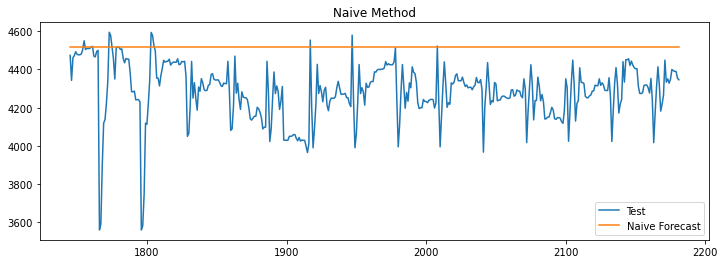

In [39]:
# plotting
plt.figure(figsize = (12, 4))
#plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

In [40]:
y_hat_naive

date   price  Year  Month_of_Year     t  t_squared  log_price  \
1745 2020-10-11  4474.0  2020             10  1746    3048516   8.406038   
1746 2020-10-12  4343.0  2020             10  1747    3052009   8.376321   
1747 2020-10-13  4461.0  2020             10  1748    3055504   8.403128   
1748 2020-10-14  4473.0  2020             10  1749    3059001   8.405815   
1749 2020-10-15  4493.0  2020             10  1750    3062500   8.410276   
...         ...     ...   ...            ...   ...        ...        ...   
2177 2021-12-17  4394.0  2021             12  2178    4743684   8.387995   
2178 2021-12-18  4390.0  2021             12  2179    4748041   8.387085   
2179 2021-12-19  4390.0  2021             12  2180    4752400   8.387085   
2180 2021-12-20  4354.0  2021             12  2181    4756761   8.378850   
2181 2021-12-21  4346.0  2021             12  2182    4761124   8.377011   

      naive_forecast  
1745          4519.0  
1746          4519.0  
1747          4519.0  
1748          4519.0  
1749          4519.0  
...              ...  
2177          4519.0  
2178          4519.0  
2179          4519.0  
2180          4519.0  
2181          4519.0  

[437 rows x 8 columns]

In [41]:
NaiveRMSE=RMSE(y_hat_naive['naive_forecast'],test['price'])
NaiveRMSE

276.63

In [42]:
NaiveMAPE=MAPE(y_hat_naive['naive_forecast'],test['price'])
NaiveMAPE

5.63

#### Simple average Forecast 
- predicted value is the arithmetic average of all previous points

In [43]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['price'].mean()

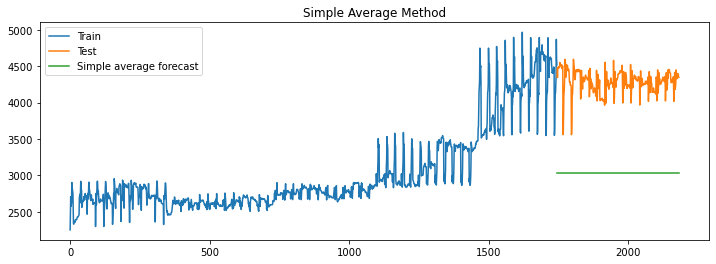

In [44]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [45]:
SA_RMSE=RMSE(y_hat_avg['avg_forecast'],test['price'])
SA_RMSE

1260.01

In [46]:
SA_MAPE=MAPE(y_hat_avg['avg_forecast'],test['price'])
SA_MAPE

29.11

#### Simple Moving Average Forecast
- predicted value is average of previous window values

In [47]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

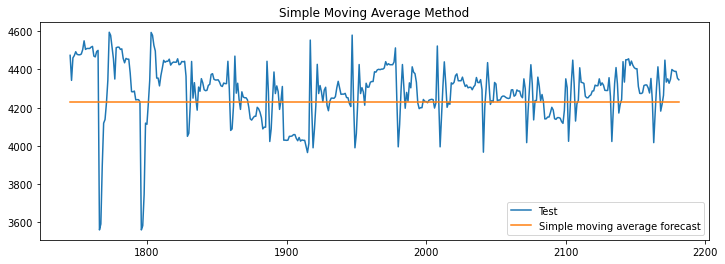

In [48]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'][train_len:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [49]:
SMA_RMSE=RMSE(y_hat_sma['sma_forecast'][train_len:],test['price'])
SMA_RMSE

157.15

In [50]:
SMA_MAPE=MAPE(y_hat_sma['sma_forecast'][train_len:],test['price'])
SMA_MAPE

2.83

#### Linear Model
- Trying to fit a straight line

In [51]:
import statsmodels.formula.api as smf 

linear_model=smf.ols('price~t',data=train).fit()
pred_linear=linear_model.predict(test)

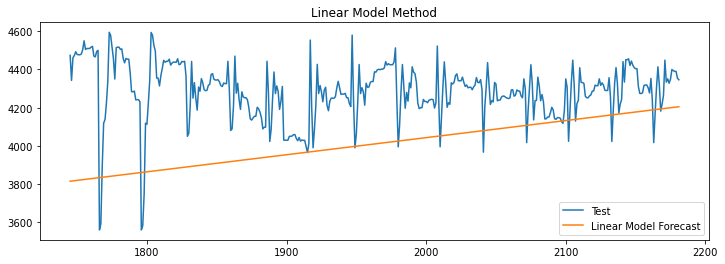

In [52]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_linear, label='Linear Model Forecast')
plt.legend(loc='best')
plt.title('Linear Model Method')
plt.show()

In [53]:
Linear_RMSE=RMSE(pred_linear,test['price'])
Linear_RMSE

336.17

In [54]:
Linear_MAPE=MAPE(pred_linear,test['price'])
Linear_MAPE

6.54

#### Exponential Model
-Fitting an exponential line 

In [55]:
exp_model=smf.ols('log_price~t',data=train).fit()
pred_exp=np.exp(exp_model.predict(test))

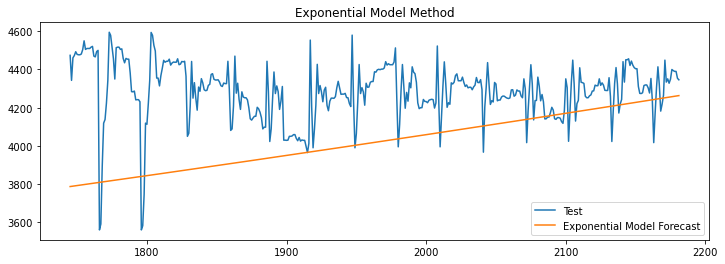

In [56]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_exp, label='Exponential Model Forecast')
plt.legend(loc='best')
plt.title('Exponential Model Method')
plt.show()

In [57]:
exp_RMSE=RMSE(pred_exp,test['price'])
exp_RMSE

337.71

In [58]:
exp_MAPE=MAPE(pred_exp,test['price'])
exp_MAPE

6.36

### SMOOTHING METHODS

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


### Simple Exponential Smoothing

In [60]:
seModel=SimpleExpSmoothing(train['price']).fit(smoothing_level=0.2)
pred_sem=seModel.predict(start=test.index[0],end=test.index[-1])


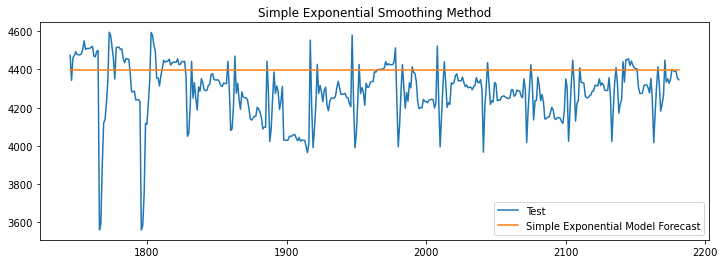

In [61]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_sem, label='Simple Exponential Model Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [62]:
SEM_RMSE=RMSE(pred_sem,test.price)
SEM_RMSE


184.89

In [63]:
SEM_MAPE=MAPE(pred_sem,test.price)
SEM_MAPE

3.38

### Holts or Double Exponential Model

In [64]:
hdeModel=Holt(train['price']).fit(smoothing_level=0.2,smoothing_slope=0.2)
pred_hdem=hdeModel.predict(start=test.index[0],end=test.index[-1])

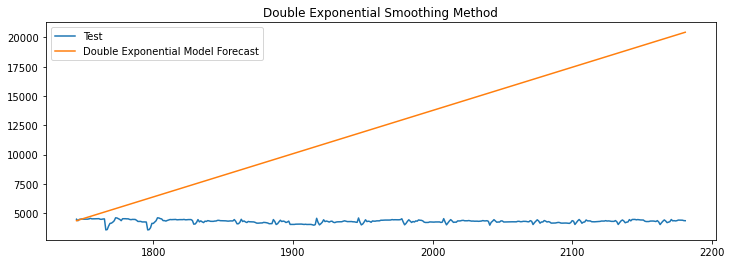

In [65]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_hdem, label='Double Exponential Model Forecast')
plt.legend(loc='best')
plt.title('Double Exponential Smoothing Method')
plt.show()

In [66]:
HDE_RMSE=RMSE(pred_hdem,test.price)
HDE_RMSE

9360.61

In [67]:
HDE_MAPE=MAPE(pred_hdem,test.price)
HDE_MAPE

189.88

### Holts Winter Exponential Smoothing with additive

In [68]:
hwaModel=ExponentialSmoothing(train['price'],seasonal='add',trend='add',seasonal_periods=36).fit()
pred_hwam=hwaModel.predict(start=test.index[0],end=test.index[-1])

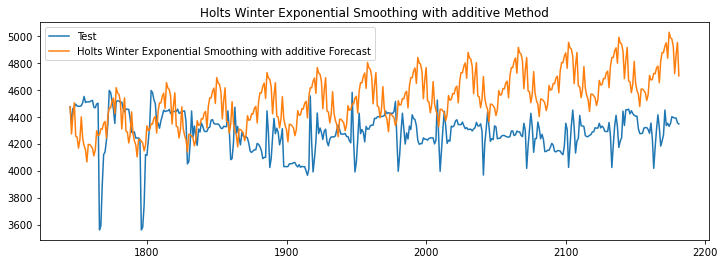

In [69]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_hwam, label='Holts Winter Exponential Smoothing with additive Forecast')
plt.legend(loc='best')
plt.title('Holts Winter Exponential Smoothing with additive Method')
plt.show()

In [70]:
HWAM_RMSE=RMSE(pred_hwam,test.price)
HWAM_RMSE

344.99

In [71]:
HWAM_MAPE=MAPE(pred_hwam,test.price)
HWAM_MAPE

6.86

### Holts Winter Exponential Smoothing with Multiplicative

In [72]:
hwmModel=ExponentialSmoothing(train['price'],seasonal='mul',trend='add',seasonal_periods=24).fit()
pred_hwmm=hwmModel.predict(start=test.index[0],end=test.index[-1])

C:\Users\amaad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


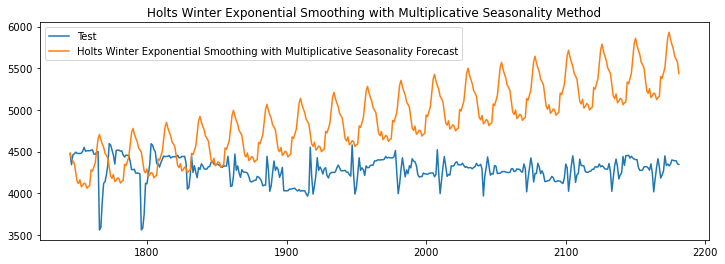

In [73]:
# Plotting
plt.figure(figsize=(12,4))
#plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_hwmm, label='Holts Winter Exponential Smoothing with Multiplicative Seasonality Forecast')
plt.legend(loc='best')
plt.title('Holts Winter Exponential Smoothing with Multiplicative Seasonality Method')
plt.show()

In [74]:
HWMM_RMSE=RMSE(pred_hwmm,test.price)
HWMM_RMSE

747.7

In [75]:
HWMM_MAPE=MAPE(pred_hwmm,test.price)
HWMM_MAPE

15.11

### Comparing All Models Accuracy

In [80]:
data = {"Models":pd.Series(["NaiveRMSE","SA_RMSE","Linear_RMSE","exp_RMSE","SEM_RMSE","HDE_RMSE","HWAM_RMSE", "HWMM_RMSE"]),
        "RMSE_Values":pd.Series([NaiveRMSE,SA_RMSE,Linear_RMSE,exp_RMSE,SEM_RMSE,HDE_RMSE,HWAM_RMSE, HWMM_RMSE]),'MAPE_Values':pd.Series([NaiveMAPE,SA_MAPE,Linear_MAPE,exp_MAPE,SEM_MAPE,HDE_MAPE,HWAM_MAPE,HWMM_MAPE])}
table_rmse=pd.DataFrame(data)
table_rmse

Models  RMSE_Values  MAPE_Values
0    NaiveRMSE       276.63         5.63
1      SA_RMSE      1260.01        29.11
2  Linear_RMSE       336.17         6.54
3     exp_RMSE       337.71         6.36
4     SEM_RMSE       184.89         3.38
5     HDE_RMSE      9360.61       189.88
6    HWAM_RMSE       344.99         6.86
7    HWMM_RMSE       747.70        15.11

In [81]:
table_rmse.sort_values(['RMSE_Values'])

Models  RMSE_Values  MAPE_Values
4     SEM_RMSE       184.89         3.38
0    NaiveRMSE       276.63         5.63
2  Linear_RMSE       336.17         6.54
3     exp_RMSE       337.71         6.36
6    HWAM_RMSE       344.99         6.86
7    HWMM_RMSE       747.70        15.11
1      SA_RMSE      1260.01        29.11
5     HDE_RMSE      9360.61       189.88

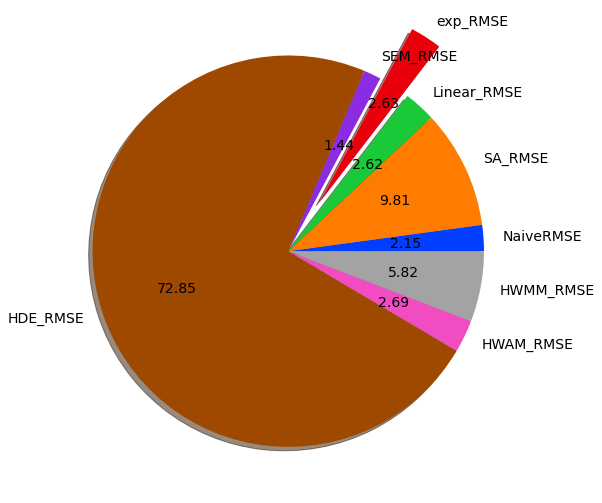

In [88]:
plt.figure(figsize=(9, 9))
palette_color = sns.color_palette('bright')
explode = [0, 0, 0, 0.3, 0, 0, 0, 0]
plt.pie(x = table_rmse['RMSE_Values'], labels = table_rmse['Models'], shadow=True, autopct = '%.2f',
       textprops={'fontsize': 14}, colors=palette_color, explode=explode)
plt.show()